Тема исследования: Прогнозирование конечных свойств новых материалов (композиционных материалов)

Цель исследования: построение моделей прогнозирования следующих параметров: «модуль упругости при растяжении»; «прочность при растяжении»; «соотношение матрица-наполнитель» 

In [5]:
import warnings
warnings.filterwarnings("default", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Загружаем данные


In [7]:
# загружаем файлы
df1 = pd.read_excel('./Data/X_bp.xlsx') 
df2 = pd.read_excel('./Data/X_nup.xlsx')
# сморим размерность
df1.shape,df2.shape 


((1023, 11), (1040, 4))

In [8]:
# объединяем датасеты
df = pd.merge(df1,df2,how = 'inner')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# 13 столбцов и 1023 строки
df.shape

(1023, 13)

In [9]:
# устраняем строки без индекса
df.dropna(inplace = True)
df.head()


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [10]:
df.shape,df.columns

((1023, 13),
 Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
        'модуль упругости, ГПа', 'Количество отвердителя, м.%',
        'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
        'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
        'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
        'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
       dtype='object'))

In [84]:
print(df.shape)
df.head(1)

(1023, 13)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                     100.0                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0

Анализируем таблицу


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [86]:
# Описательная статистика 
df.describe() 


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [87]:
df.describe().T


count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [88]:
#  Делаем подсчет уникальных значений по столбцам 

df.nunique()


Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [89]:
df.isna()# маска с пропущенными значениями


Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                               False             False   
1                               False             False   
2                               False             False   
3                               False             False   
4                               False             False   
...                               ...               ...   
1018                            False             False   
1019                            False             False   
1020                            False             False   
1021                            False             False   
1022                            False             False   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                     False                        False   
1                     False                        False   
2                     False                        False   
3                     False                        False   
4                     False                        False   
...                     ...                          ...   
1018                  False                        False   
1019                  False                        False   
1020                  False                        False   
1021                  False                        False   
1022                  False                        False   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                               False                     False   
1                               False                     False   
2                               False                     False   
3                               False                     False   
4                               False                     False   
...                               ...                       ...   
1018                            False                     False   
1019                            False                     False   
1020                            False                     False   
1021                            False                     False   
1022                            False                     False   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
1018                          False                                 False   
1019                          False                                 False   
1020                          False                                 False   
1021                          False                                 False   
1022                          False                                 False   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   
...                             ...                      ...   
1018                          False                    False   
1019                          False                    False   
1020                          False                    False   
1021                          False                    False   
1022                          False                    False   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [90]:
df.isna().sum() # подсчет пропущенных значений 


Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [91]:
df.duplicated().sum() # Поиск дубликатов

0

In [92]:
# Коэффициенты корреляции Пирсона.

df.corr(method ='pearson')


Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.003841   
модуль упругости, ГПа                                        0.031700   
Количество отвердителя, м.%                                 -0.006445   
Содержание эпоксидных групп,%_2                              0.019766   
Температура вспышки, С_2                                    -0.004776   
Поверхностная плотность, г/м2                               -0.006272   
Модуль упругости при растяжении, ГПа                        -0.008411   
Прочность при растяжении, МПа                                0.024148   
Потребление смолы, г/м2                                      0.072531   
Угол нашивки, град                                          -0.031073   
Шаг нашивки                                                  0.036437   
Плотность нашивки                                           -0.004652   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.003841               0.031700   
Плотность, кг/м3                              1.000000              -0.009647   
модуль упругости, ГПа                        -0.009647               1.000000   
Количество отвердителя, м.%                  -0.035911               0.024049   
Содержание эпоксидных групп,%_2              -0.008278              -0.006804   
Температура вспышки, С_2                     -0.020695               0.031174   
Поверхностная плотность, г/м2                 0.044930              -0.005306   
Модуль упругости при растяжении, ГПа         -0.017602               0.023267   
Прочность при растяжении, МПа                -0.069981               0.041868   
Потребление смолы, г/м2                      -0.015937               0.001840   
Угол нашивки, град                           -0.068474              -0.025417   
Шаг нашивки                                  -0.061015              -0.009875   
Плотность нашивки                             0.080304               0.056346   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                         -0.006445   
Плотность, кг/м3                                        -0.035911   
модуль упругости, ГПа                                    0.024049   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                         -0.000684   
Температура вспышки, С_2                                 0.095193   
Поверхностная плотность, г/м2                            0.055198   
Модуль упругости при растяжении, ГПа                    -0.065929   
Прочность при растяжении, МПа                           -0.075375   
Потребление смолы, г/м2                                  0.007446   
Угол нашивки, град                                       0.038570   
Шаг нашивки                                              0.014887   
Плотность нашивки                                        0.017248   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.019766   
Плотность, кг/м3                                            -0.008278   
модуль упругости, ГПа                                       -0.006804   
Количество отвердителя, м.%                                 -0.000684   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.009769   
Поверхностная плотность, г/м2                               -0.012940   
Модуль упругости при растяжении, ГПа                         0.056828   
Прочность при растяжении, МПа                               -0.023899   
Потребление смолы, г/м2                                      0.015165   
Угол нашивки, град                                           0.008052   
Шаг нашивки                          

In [93]:
# Коэффициенты ранговой корреляции Кендалла.

df.corr(method = 'kendall') 


Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                            -0.003135   
модуль упругости, ГПа                                        0.021247   
Количество отвердителя, м.%                                  0.001410   
Содержание эпоксидных групп,%_2                              0.010180   
Температура вспышки, С_2                                    -0.009480   
Поверхностная плотность, г/м2                               -0.002060   
Модуль упругости при растяжении, ГПа                        -0.004157   
Прочность при растяжении, МПа                                0.011614   
Потребление смолы, г/м2                                      0.035145   
Угол нашивки, град                                          -0.021395   
Шаг нашивки                                                  0.022723   
Плотность нашивки                                            0.002788   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель              -0.003135               0.021247   
Плотность, кг/м3                              1.000000              -0.008059   
модуль упругости, ГПа                        -0.008059               1.000000   
Количество отвердителя, м.%                  -0.021963               0.022382   
Содержание эпоксидных групп,%_2              -0.007758               0.002351   
Температура вспышки, С_2                     -0.019947               0.021028   
Поверхностная плотность, г/м2                 0.037302              -0.000442   
Модуль упругости при растяжении, ГПа         -0.021151               0.005458   
Прочность при растяжении, МПа                -0.047426               0.022959   
Потребление смолы, г/м2                      -0.017079               0.005169   
Угол нашивки, град                           -0.051525              -0.031695   
Шаг нашивки                                  -0.031220              -0.008305   
Плотность нашивки                             0.052935               0.049347   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.001410   
Плотность, кг/м3                                        -0.021963   
модуль упругости, ГПа                                    0.022382   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.000010   
Температура вспышки, С_2                                 0.059034   
Поверхностная плотность, г/м2                            0.033110   
Модуль упругости при растяжении, ГПа                    -0.043140   
Прочность при растяжении, МПа                           -0.046507   
Потребление смолы, г/м2                                 -0.003677   
Угол нашивки, град                                       0.024690   
Шаг нашивки                                              0.006232   
Плотность нашивки                                        0.016607   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.010180   
Плотность, кг/м3                                            -0.007758   
модуль упругости, ГПа                                        0.002351   
Количество отвердителя, м.%                                  0.000010   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.002170   
Поверхностная плотность, г/м2                               -0.006859   
Модуль упругости при растяжении, ГПа                         0.041994   
Прочность при растяжении, МПа                               -0.013441   
Потребление смолы, г/м2                                      0.009756   
Угол нашивки, град                                           0.004668   
Шаг нашивки                          

Рисуем гистограммы

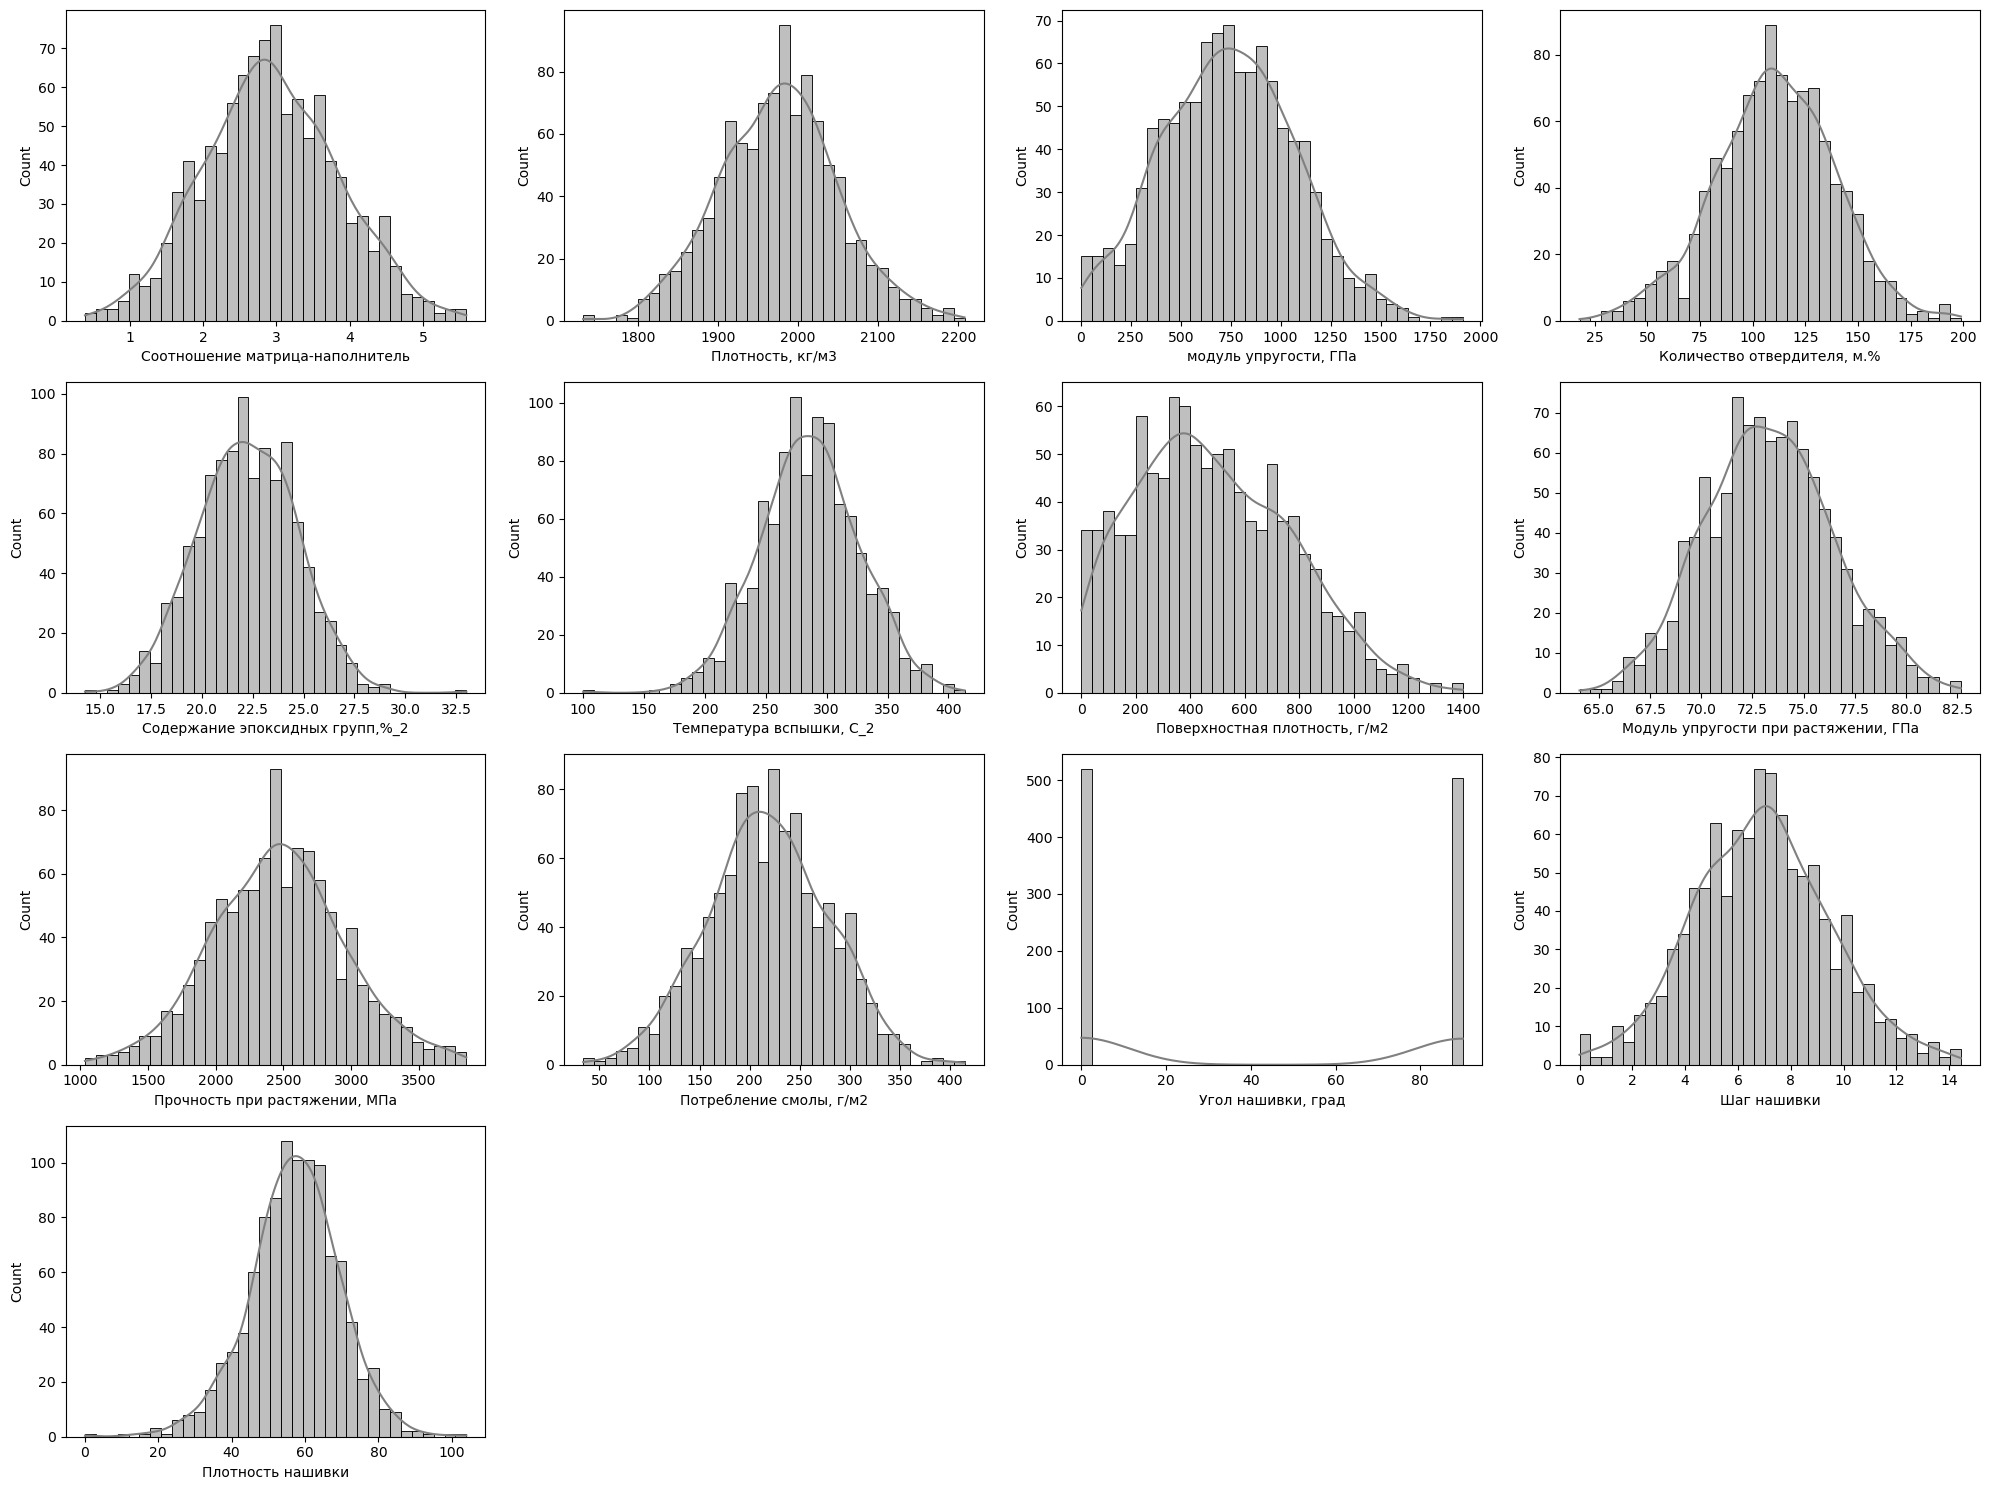

In [94]:
from matplotlib.colorbar import colorbar_factory
def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=35, color = 'grey')
    fig.tight_layout()
    plt.show()

histogram(df, 4, 4)


Попарные графики рассеяния

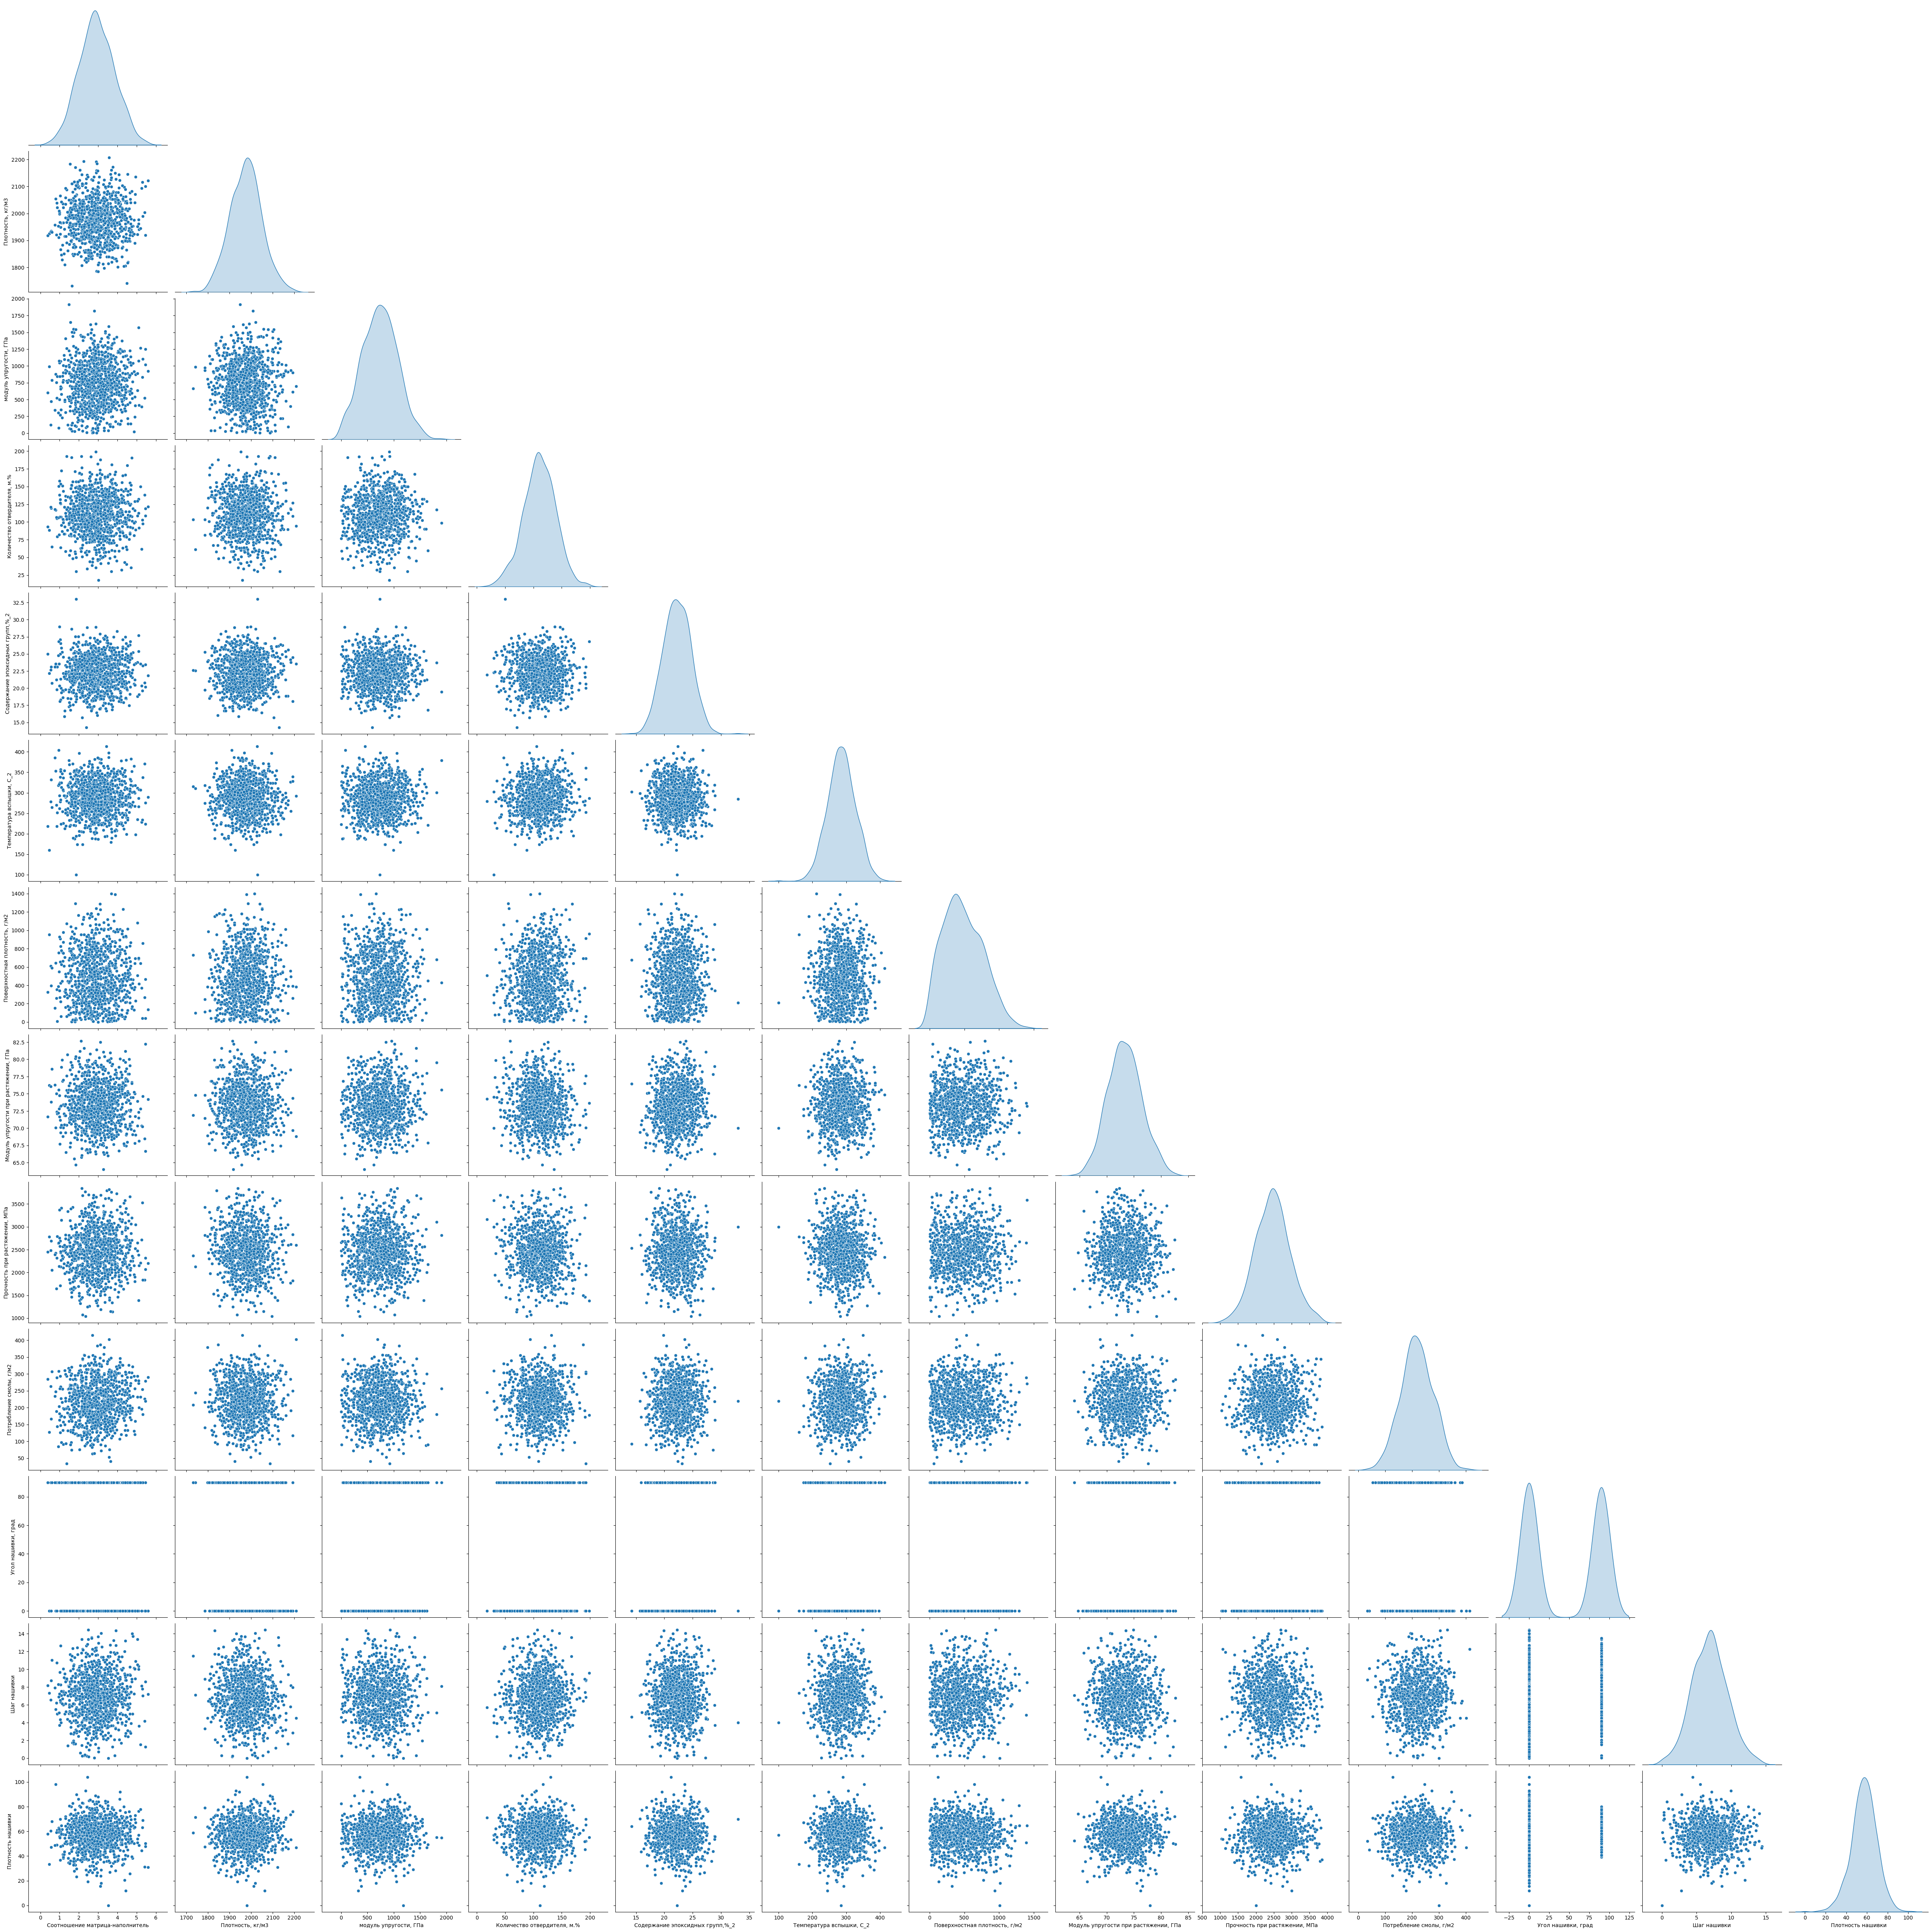

In [11]:
sns.pairplot(df, height=4, diag_kind='kde', corner = True);

In [12]:
sns.pairplot(df, hue="Модуль упругости при растяжении, ГПа")


In [13]:
sns.pairplot(df, hue="Прочность при растяжении, МПа")

Диаграмма "Ящик с усами" (Boxplot)

In [31]:
# Отрисовка боксплотов ящиклв с усами и плотности ядра
def box_pl2(df):
  col = 5  # столбцы
  k = 1  # счетчик
  row = 3  # строки
  fig = plt.figure(figsize=(15, 30))
  for i in df.columns:
      plt.subplot(row, col, k)
      plt.xlabel(i)
      sns.boxplot(y = df[i])
      k+=1
    
  plt.show()

def box_pl3(df):
    sns.boxplot(data = df, orient="h")
    plt.show()

def plt_plot(df_n):
  fig, ax = plt.subplots(figsize=(20, 10))
  df_n.plot(kind='kde', ax=ax)
  plt.show()


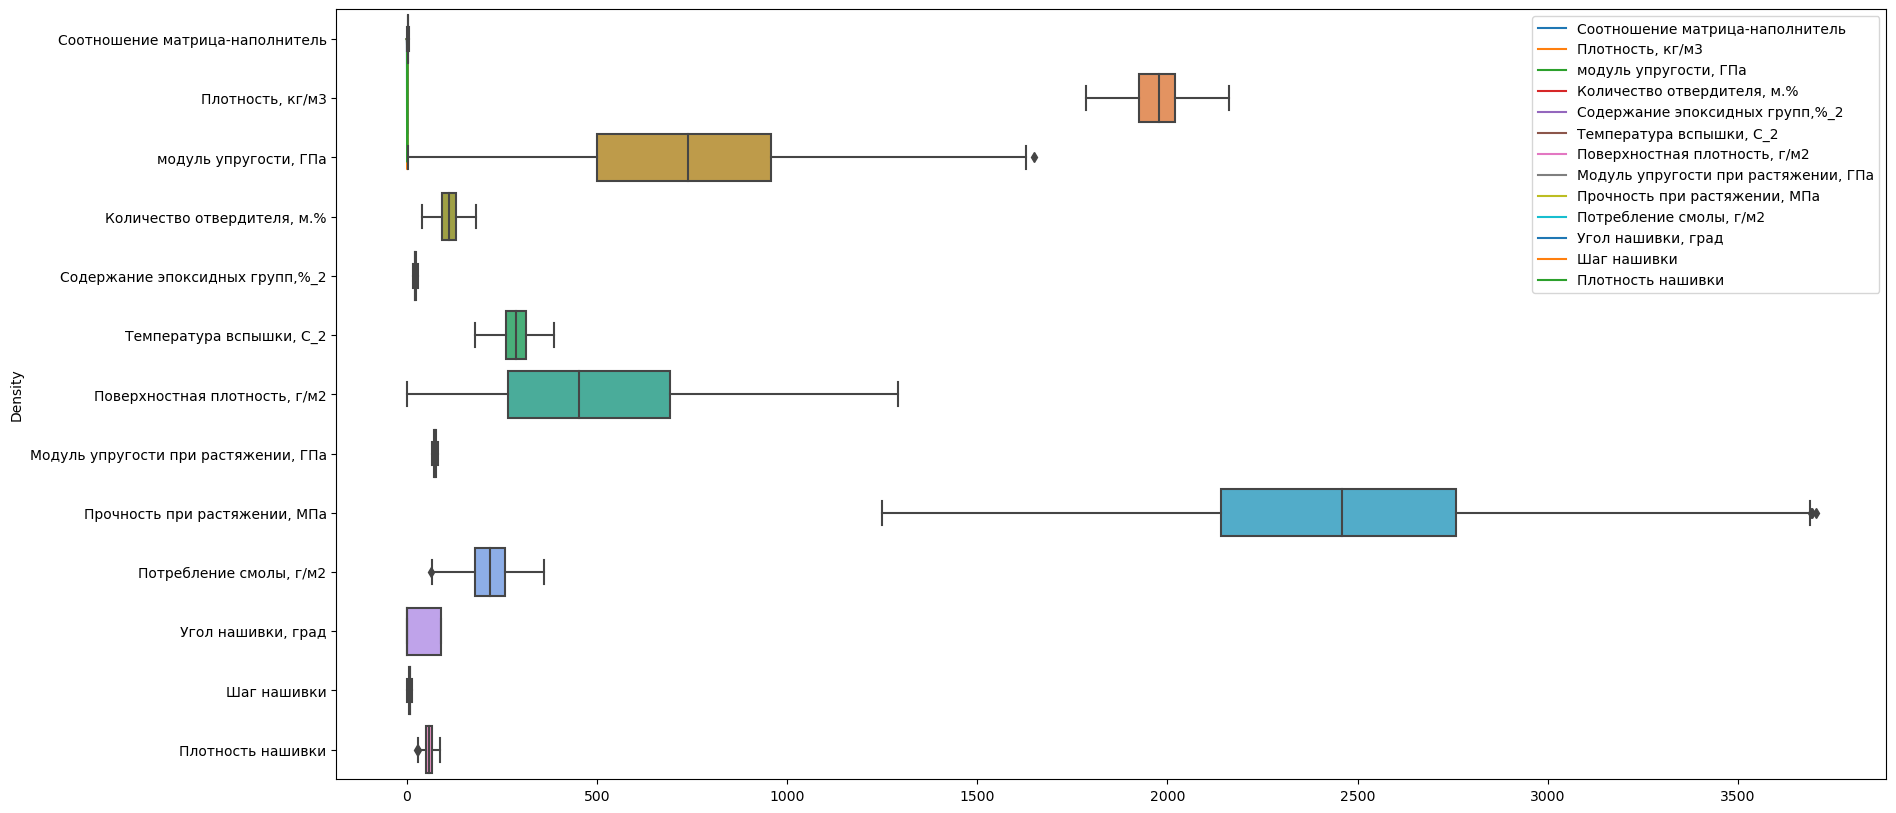

In [32]:
box_pl3(df)


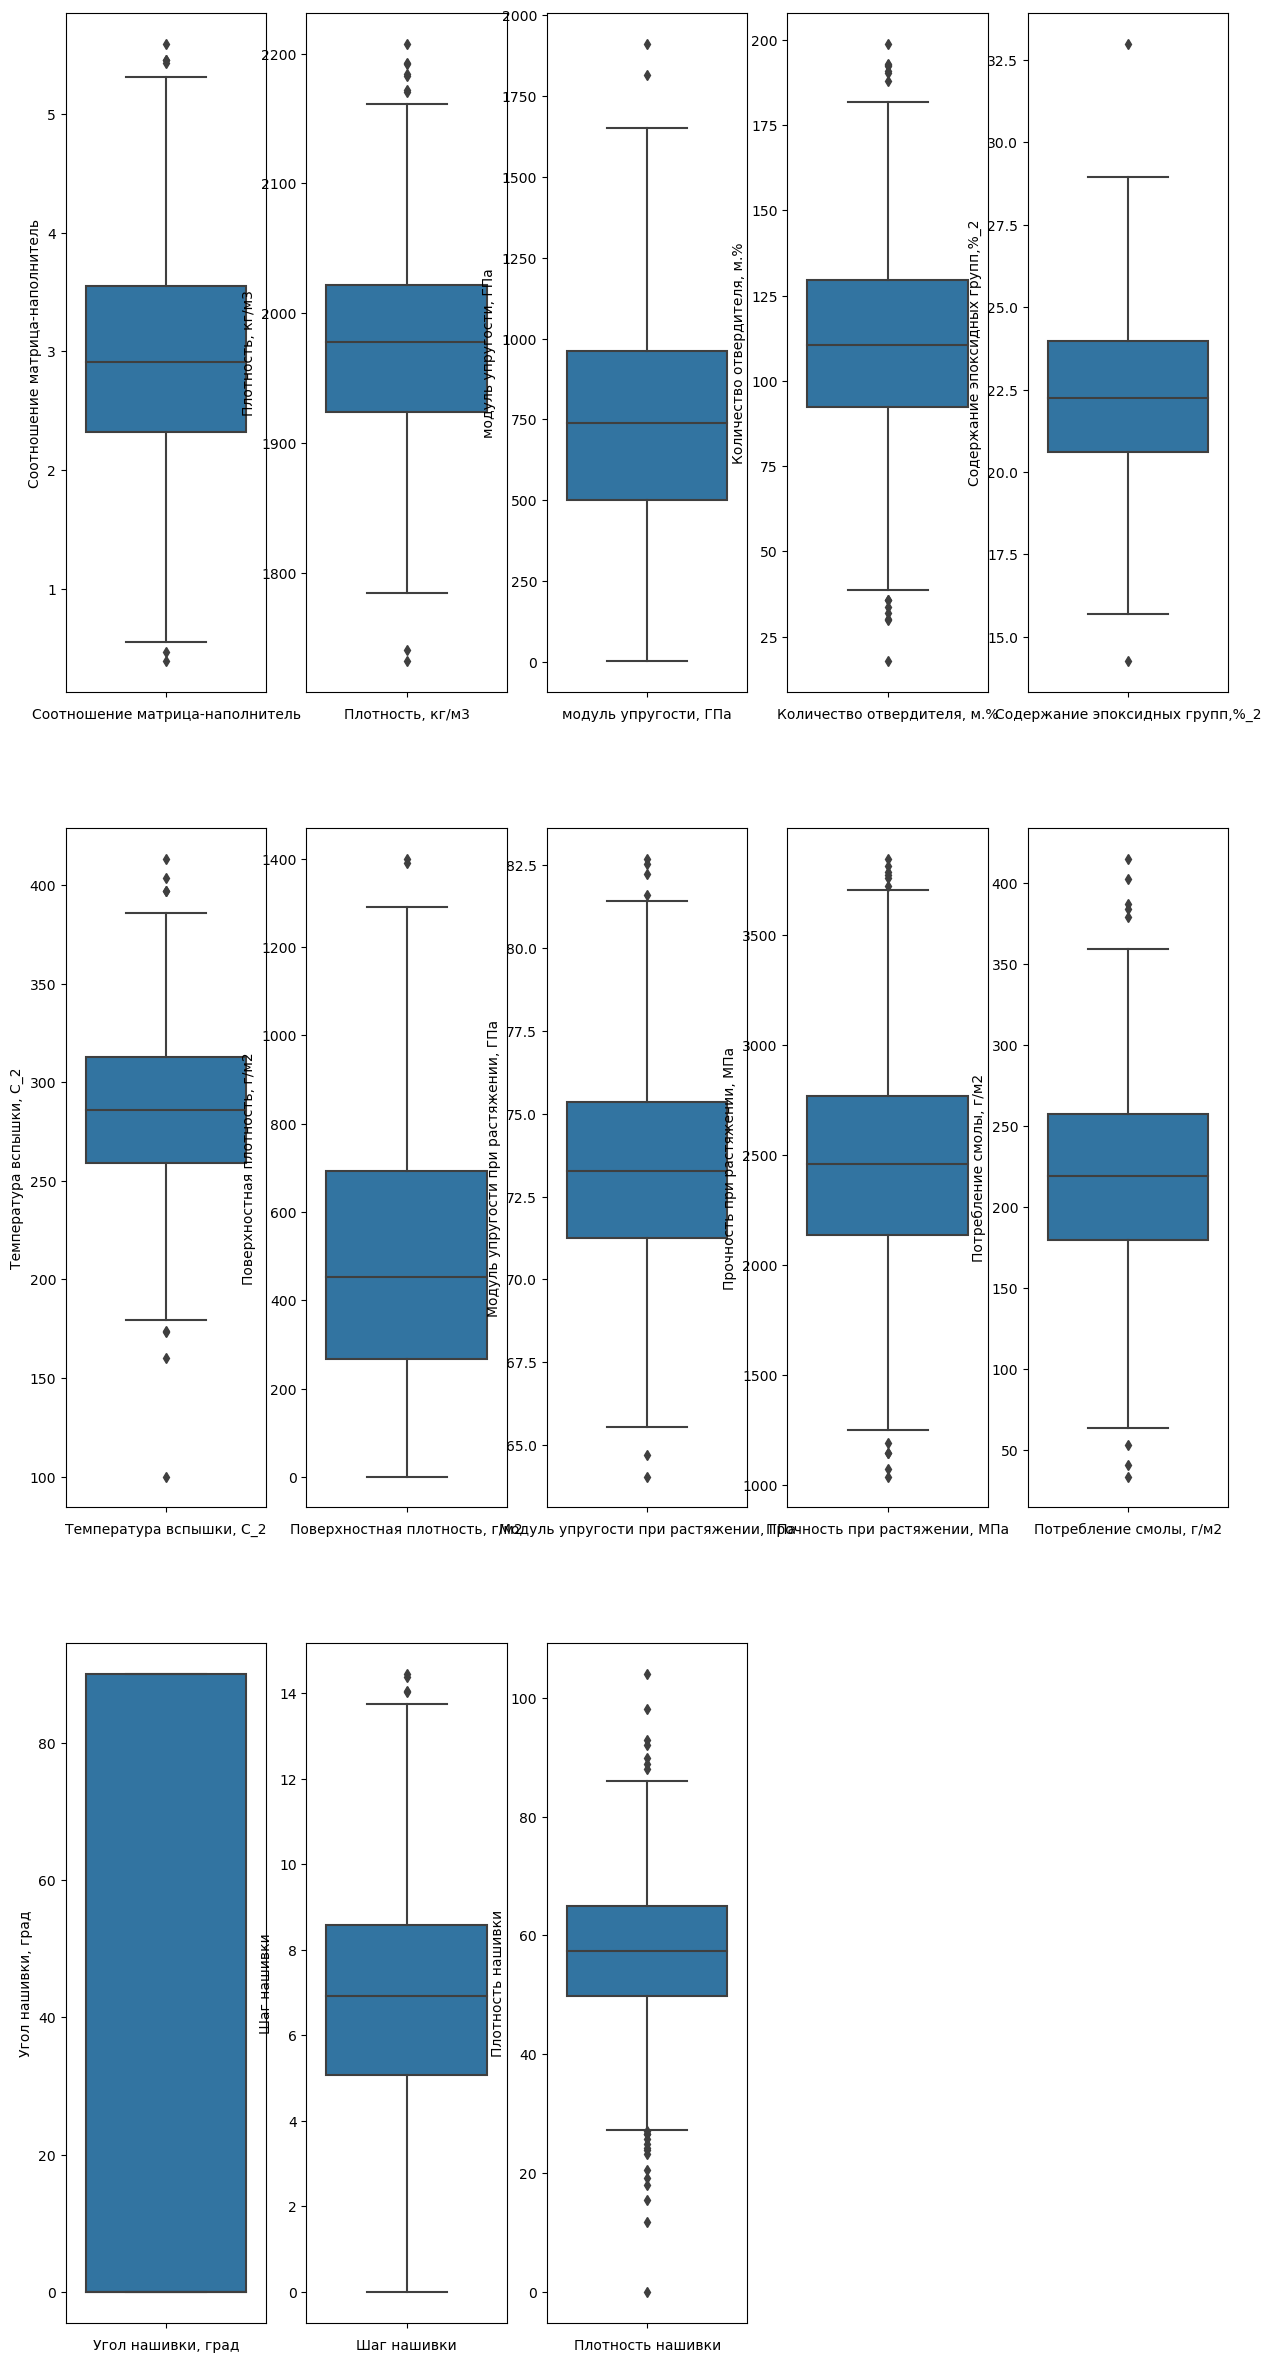

In [18]:
box_pl2(df)

Приводим столбец к 0 и 1, Угол нашивки, град

In [98]:
# Приводим столбец к 0 и 1
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df.iloc[:,10] = df.iloc[:,10].astype(int)
df.iloc[:,10]


0       0
1       0
2       0
3       0
4       0
       ..
1018    1
1019    1
1020    1
1021    1
1022    1
Name: Угол нашивки, град, Length: 1023, dtype: int64

удаление методом межквартильных расстояний или 3сигм

In [19]:
# Метод 3-х сигм тест

metod = 0
count = []

for column in df:
    d = df.loc[:, [column]]
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    metod += d['3s'].sum()
    count.append(d['3s'].sum())
    print(column,'3s', ': ', d['3s'].sum())
print('Выбросы: ', metod)

Соотношение матрица-наполнитель 3s :  0
Плотность, кг/м3 3s :  3
модуль упругости, ГПа 3s :  2
Количество отвердителя, м.% 3s :  2
Содержание эпоксидных групп,%_2 3s :  2
Температура вспышки, С_2 3s :  3
Поверхностная плотность, г/м2 3s :  2
Модуль упругости при растяжении, ГПа 3s :  0
Прочность при растяжении, МПа 3s :  0
Потребление смолы, г/м2 3s :  3
Угол нашивки, град 3s :  0
Шаг нашивки 3s :  0
Плотность нашивки 3s :  7
Выбросы:  24


In [20]:
# Межквартильне расстояния тест

metod = 0
count = []

for column in df:
    d = df.loc[:, [column]]
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod += d['iq'].sum()
    count.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Выбросы: ', metod)

Соотношение матрица-наполнитель :  6
Плотность, кг/м3 :  9
модуль упругости, ГПа :  2
Количество отвердителя, м.% :  14
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 :  8
Поверхностная плотность, г/м2 :  2
Модуль упругости при растяжении, ГПа :  6
Прочность при растяжении, МПа :  11
Потребление смолы, г/м2 :  8
Угол нашивки, град :  0
Шаг нашивки :  4
Плотность нашивки :  21
Выбросы:  93


Выбран метод межквантильных интервалов по результатам тестов

In [22]:
# убираем выбросы

dropen = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Угол нашивки, град",
                 "Шаг нашивки",
                 "Плотность нашивки"]

# Чистим через цикл
for i in dropen:
    qvan_75, qvan_25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = qvan_75 - qvan_25
    max = qvan_75 + (1.5 * intr_qr) # выбрана размашка 1,5
    min = qvan_25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

df_n = df.dropna(axis=0)
df_n.shape



(936, 13)

"Ящик с усами" после удаления выбросов

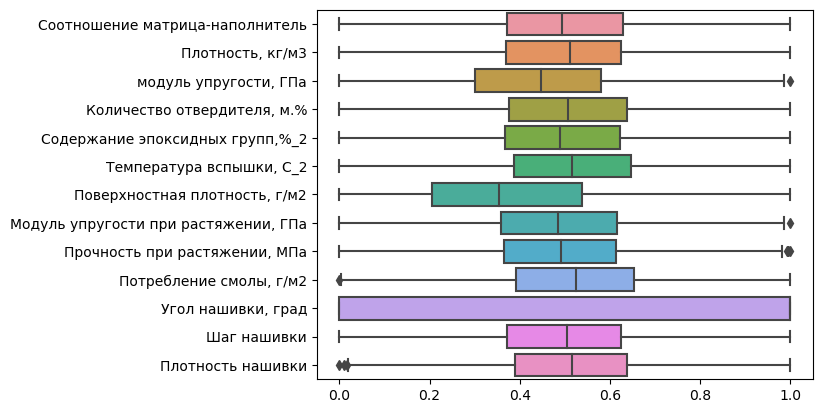

In [33]:
# Смотрим что получилось
box_pl3(df_n)

In [24]:
df_n.shape

(936, 13)

Оценка плотности ядра

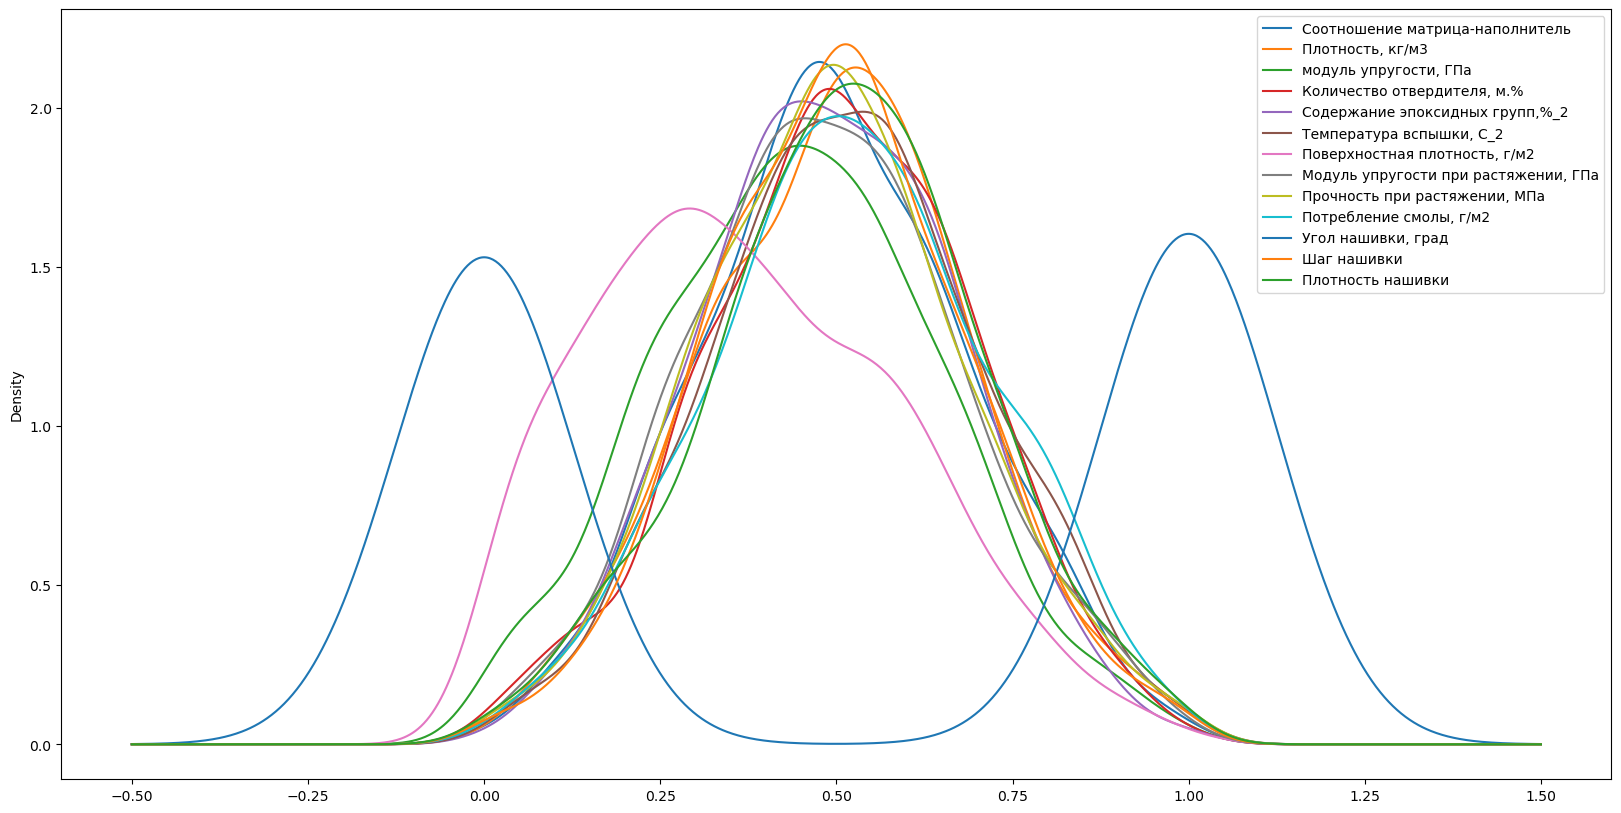

In [34]:
plt_plot(df_n)


In [106]:
df_n

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [25]:
minmax_scaler = MinMaxScaler()

#обучение нормализатора 
dataset_norm = minmax_scaler.fit_transform(np.array(df_n[["Соотношение матрица-наполнитель",                    
                                                          "Плотность, кг/м3",
                                                          "модуль упругости, ГПа",
                                                          "Количество отвердителя, м.%",
                                                          "Содержание эпоксидных групп,%_2",
                                                          "Температура вспышки, С_2",
                                                          "Поверхностная плотность, г/м2",
                                                          "Модуль упругости при растяжении, ГПа",
                                                          "Прочность при растяжении, МПа",
                                                          "Потребление смолы, г/м2",
                                                          "Угол нашивки, град",
                                                          "Шаг нашивки",
                                                          "Плотность нашивки"]]))  
 
dataset_norm

array([[0.27476816, 0.65109743, 0.44706097, ..., 0.        , 0.28933398,
        0.55715613],
       [0.27476816, 0.65109743, 0.44706097, ..., 0.        , 0.36235459,
        0.33583998],
       [0.46655243, 0.65109743, 0.45572116, ..., 0.        , 0.36235459,
        0.50608317],
       ...,
       [0.57339108, 0.49827395, 0.25161199, ..., 1.        , 0.30110155,
        0.68704631],
       [0.66249718, 0.74868808, 0.44872381, ..., 1.        , 0.45824529,
        0.5275521 ],
       [0.6840357 , 0.28092285, 0.25190326, ..., 1.        , 0.44113663,
        0.85396608]])

In [26]:
#возвращаем название столбцов преобразование обратно в датафрейм
del df_n
df_n = pd.DataFrame(data=dataset_norm, columns=["Соотношение матрица-наполнитель",                    
                                                          "Плотность, кг/м3",
                                                          "модуль упругости, ГПа",
                                                          "Количество отвердителя, м.%",
                                                          "Содержание эпоксидных групп,%_2",
                                                          "Температура вспышки, С_2",
                                                          "Поверхностная плотность, г/м2",
                                                          "Модуль упругости при растяжении, ГПа",
                                                          "Прочность при растяжении, МПа",
                                                          "Потребление смолы, г/м2",
                                                          "Угол нашивки, град",
                                                          "Шаг нашивки",
                                                          "Плотность нашивки"])

df_n.head()


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.447061   
1                         0.274768          0.651097               0.447061   
2                         0.466552          0.651097               0.455721   
3                         0.465836          0.571539               0.452685   
4                         0.424236          0.332865               0.488508   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.280303                        0.71259   
1                              0.280303                        0.71259   
2                              0.280303                        0.71259   
3                              0.280303                        0.71259   
4                              0.280303                        0.71259   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.529221                 0.0     0.289334           0.557156  
1                 0.529221                 0.0     0.362355           0.335840  
2                 0.529221                 0.0     0.362355           0.506083  
3                 0.529221                 0.0     0.362355           0.557156  
4                 0.529221                 0.0     0.362355           0.727399

In [27]:
df_n.head().T

0         1         2         3  \
Соотношение матрица-наполнитель       0.274768  0.274768  0.466552  0.465836   
Плотность, кг/м3                      0.651097  0.651097  0.651097  0.571539   
модуль упругости, ГПа                 0.447061  0.447061  0.455721  0.452685   
Количество отвердителя, м.%           0.079153  0.630983  0.511257  0.511257   
Содержание эпоксидных групп,%_2       0.607435  0.418887  0.495653  0.495653   
Температура вспышки, С_2              0.509164  0.583596  0.509164  0.509164   
Поверхностная плотность, г/м2         0.162230  0.162230  0.162230  0.162230   
Модуль упругости при растяжении, ГПа  0.280303  0.280303  0.280303  0.280303   
Прочность при растяжении, МПа         0.712590  0.712590  0.712590  0.712590   
Потребление смолы, г/м2               0.529221  0.529221  0.529221  0.529221   
Угол нашивки, град                    0.000000  0.000000  0.000000  0.000000   
Шаг нашивки                           0.289334  0.362355  0.362355  0.362355   
Плотность нашивки                     0.557156  0.335840  0.506083  0.557156   

                                             4  
Соотношение матрица-наполнитель       0.424236  
Плотность, кг/м3                      0.332865  
модуль упругости, ГПа                 0.488508  
Количество отвердителя, м.%           0.511257  
Содержание эпоксидных групп,%_2       0.495653  
Температура вспышки, С_2              0.509164  
Поверхностная плотность, г/м2         0.162230  
Модуль упругости при растяжении, ГПа  0.280303  
Прочность при растяжении, МПа         0.712590  
Потребление смолы, г/м2               0.529221  
Угол нашивки, град                    0.000000  
Шаг нашивки                           0.362355  
Плотность нашивки                     0.727399

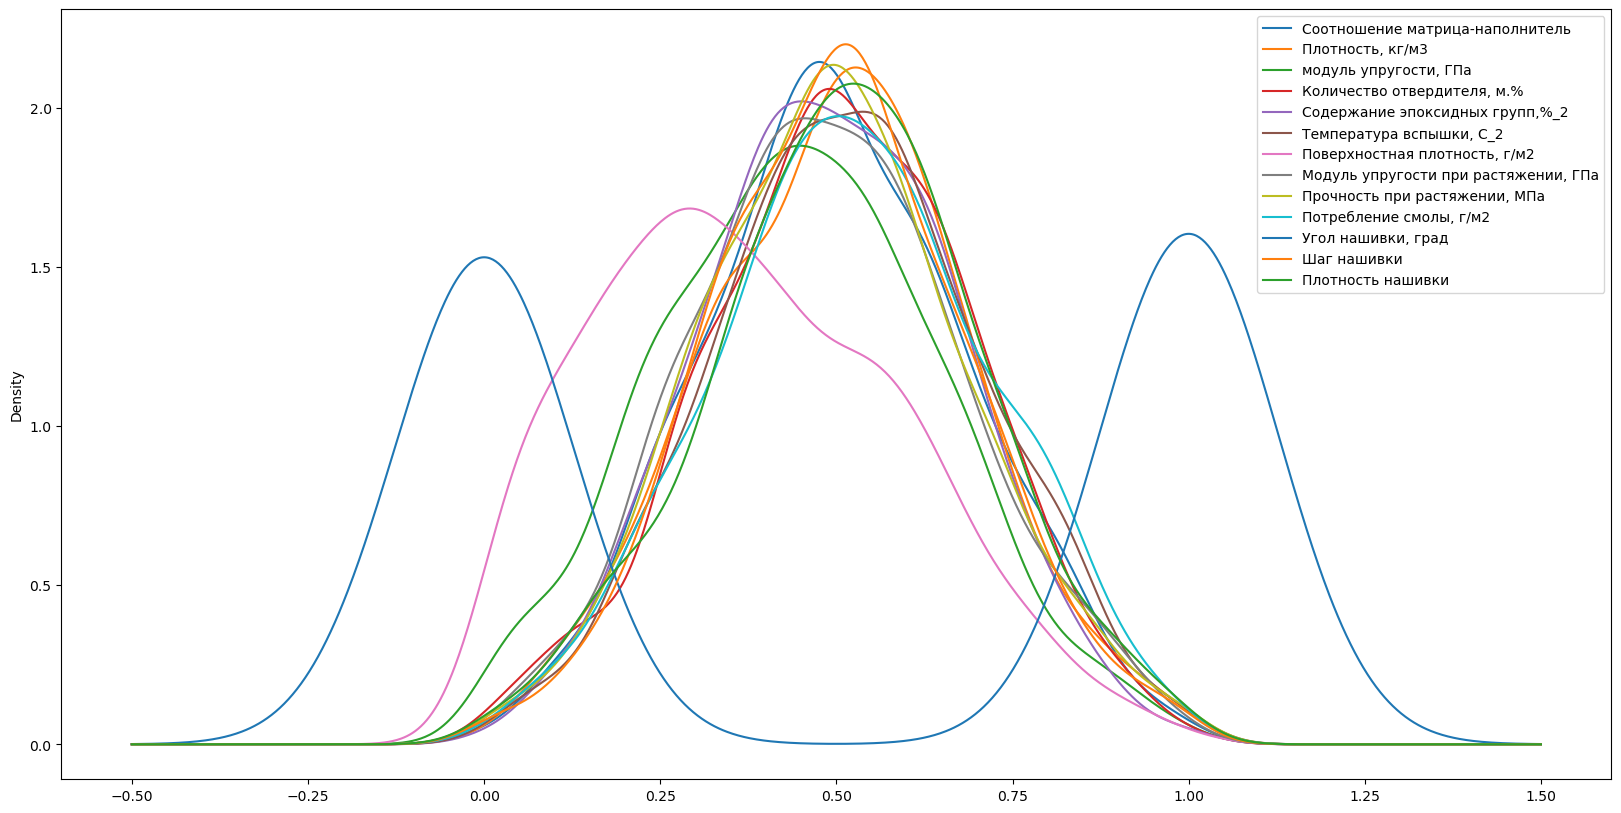

In [35]:
plt_plot(df_n)


Описательная статистика характеристик после нормализации

In [111]:
df_n.describe().T.round(2)

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       936.0  0.50  0.19  0.0  0.37  0.49   
Плотность, кг/м3                      936.0  0.50  0.19  0.0  0.37  0.51   
модуль упругости, ГПа                 936.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           936.0  0.50  0.19  0.0  0.38  0.51   
Содержание эпоксидных групп,%_2       936.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              936.0  0.52  0.19  0.0  0.39  0.52   
Поверхностная плотность, г/м2         936.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  936.0  0.49  0.19  0.0  0.36  0.49   
Прочность при растяжении, МПа         936.0  0.50  0.19  0.0  0.37  0.49   
Потребление смолы, г/м2               936.0  0.52  0.20  0.0  0.39  0.52   
Угол нашивки, град                    936.0  0.51  0.50  0.0  0.00  1.00   
Шаг нашивки                           936.0  0.50  0.18  0.0  0.37  0.50   
Плотность нашивки                     936.0  0.51  0.19  0.0  0.39  0.52   

                                       75%  max  
Соотношение матрица-наполнитель       0.63  1.0  
Плотность, кг/м3                      0.62  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.64  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.65  1.0  
Поверхностная плотность, г/м2         0.54  1.0  
Модуль упругости при растяжении, ГПа  0.62  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.65  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.62  1.0  
Плотность нашивки                     0.64  1.0

Оценим ящик с усами после нормализации

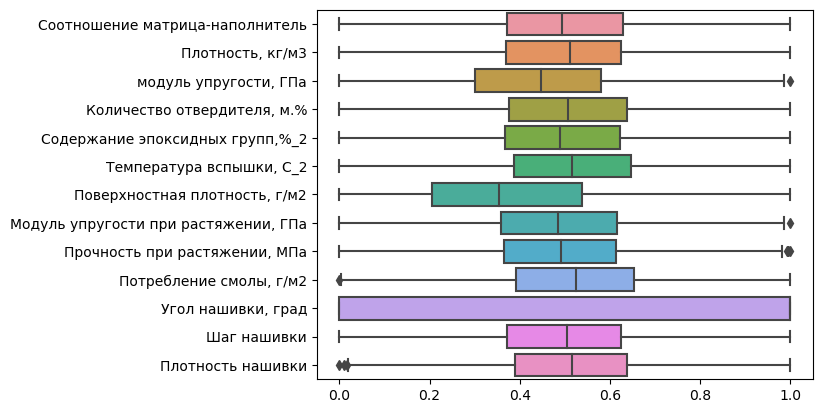

In [112]:
# Смотрим что получилось
#выбросы соответствуют нормальному распределению
box_pl3(df_n)


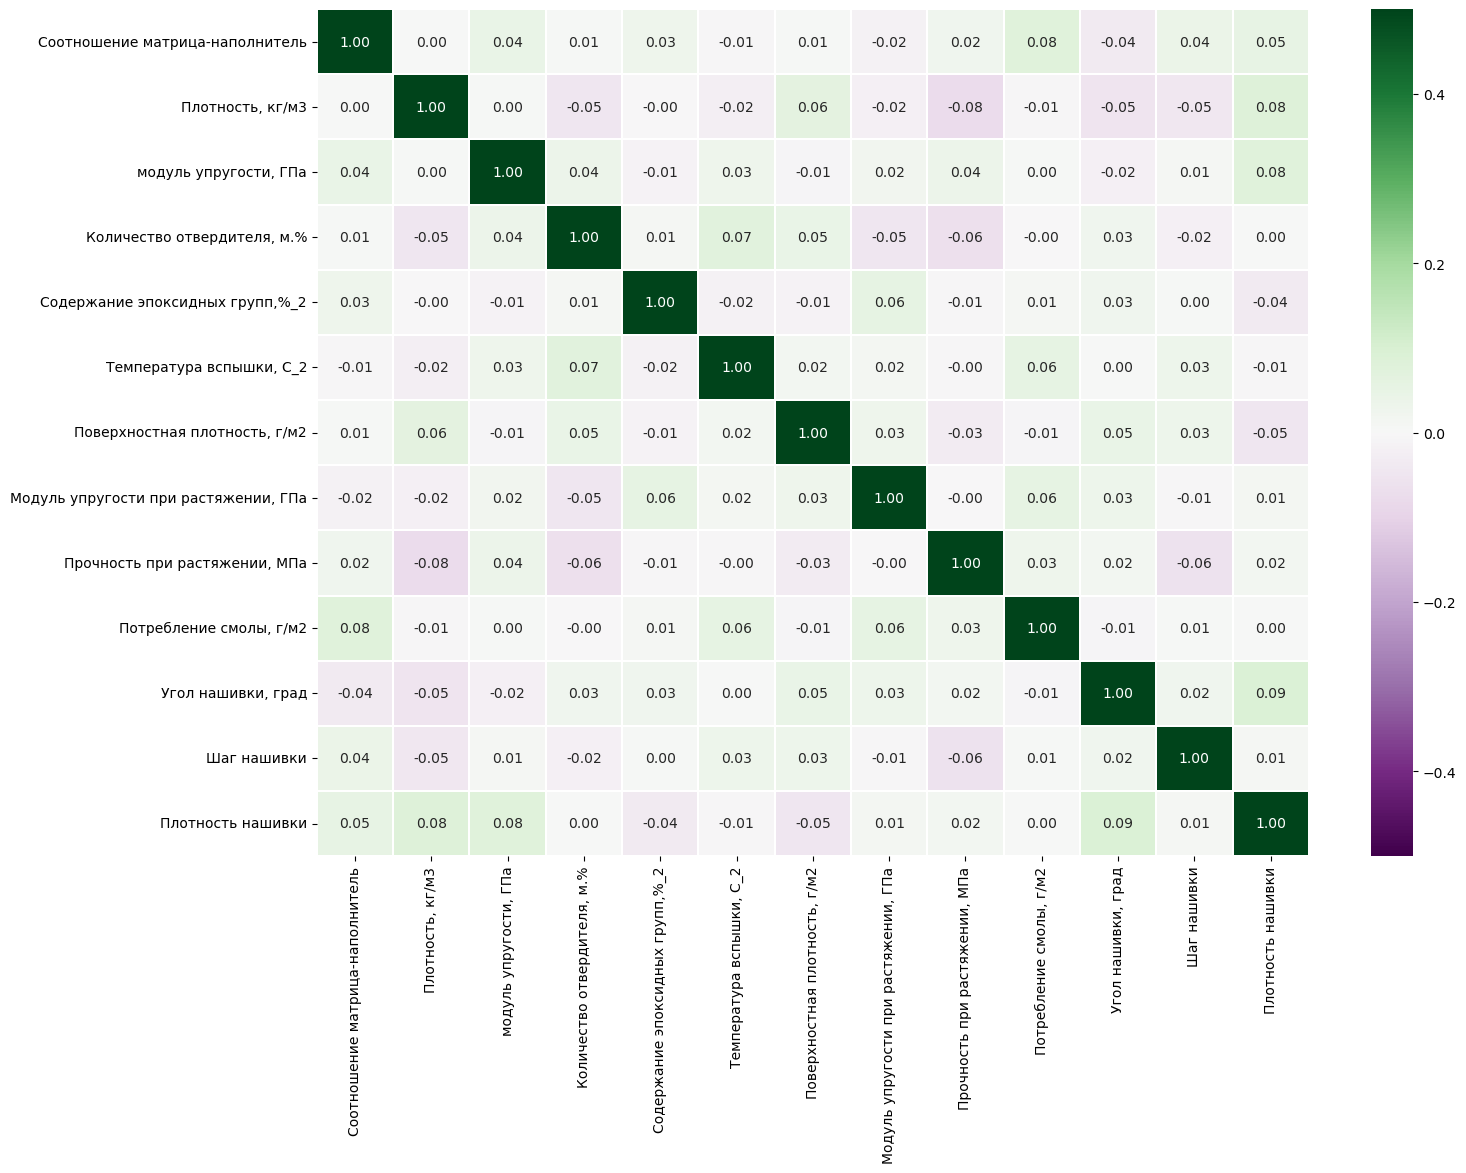

In [114]:
# Тепловая карта
corr = df_n.corr()
fig, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
plt.show()
# наблюдается зависимость между Плостностью и углом нашивки
# но она довольно слабая  в остальных местах ее практически нет

In [37]:
# После проведенной работы сохраняем готовый датасет.
df_n.to_excel('./data/X_cln.xlsx')


In [38]:
data = pd.read_excel('./data/X_clean.xlsx')#Загрузка чистого датасета
data.drop(['Unnamed: 0'], axis=1, inplace=True)
#Проверка размерности
data.shape

(926, 13)

In [39]:
#Копирование датасета.
data_norm = data.copy()

In [40]:
#Нормализация MinMaxScaler() 
scaler = preprocessing.MinMaxScaler()
col = data_norm.columns
result = scaler.fit_transform(data_norm)
minmax = pd.DataFrame(result, columns = col)

#Обратный перевод
result = scaler.inverse_transform(minmax)
initial_data = pd.DataFrame(result, columns = minmax.columns)


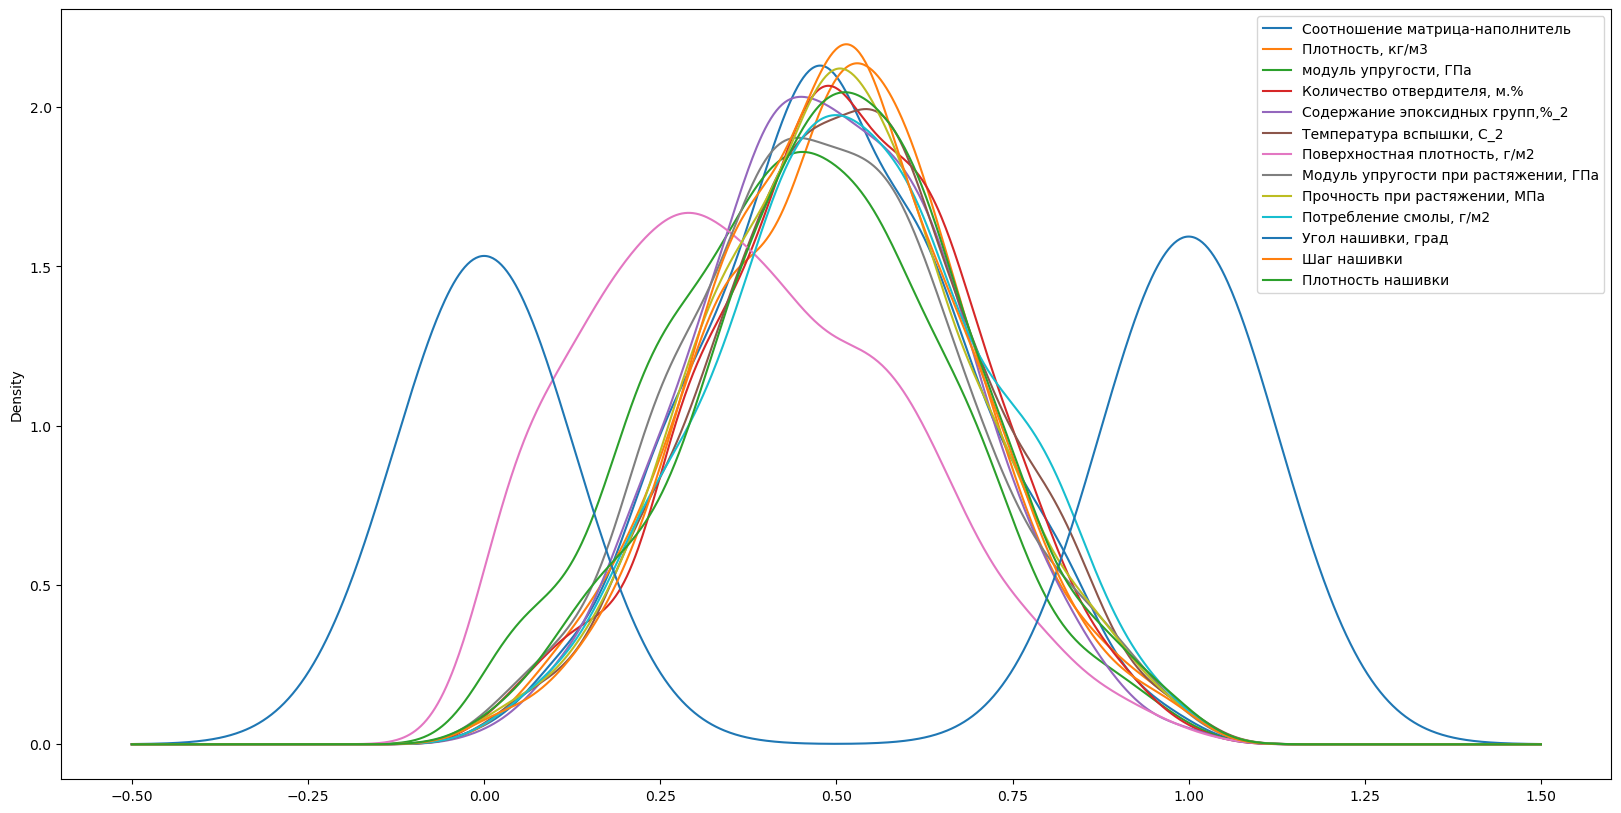

In [41]:
plt_plot(minmax)


In [42]:
#Нормализация данных с помощью Normalizer()
normalizer = Normalizer()
res = normalizer.fit_transform(data_norm)
normal = pd.DataFrame(res, columns = data_norm.columns)
normal

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.000499          0.545436               0.198490   
1                           0.000499          0.545011               0.198335   
2                           0.000744          0.544829               0.202097   
3                           0.000746          0.539271               0.201687   
4                           0.000699          0.519919               0.219673   
..                               ...               ...                    ...   
921                         0.000700          0.601751               0.281397   
922                         0.001078          0.641795               0.139227   
923                         0.000953          0.573123               0.121122   
924                         0.001192          0.664667               0.238453   
925                         0.001071          0.531728               0.117381   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.013434                         0.006381   
1                       0.034634                         0.005705   
2                       0.030022                         0.005976   
3                       0.030161                         0.006004   
4                       0.030449                         0.006062   
..                           ...                              ...   
921                     0.026816                         0.006203   
922                     0.045701                         0.006136   
923                     0.032118                         0.006961   
924                     0.045473                         0.006190   
925                     0.036336                         0.007728   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.076473                       0.056424   
1                    0.080543                       0.056380   
2                    0.076388                       0.056362   
3                    0.076742                       0.056623   
4                    0.077475                       0.057164   
..                        ...                            ...   
921                  0.100115                       0.064488   
922                  0.079584                       0.109777   
923                  0.072186                       0.215067   
924                  0.088689                       0.206291   
925                  0.084651                       0.213418   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.018808                       0.806064   
1                                0.018793                       0.805435   
2                                0.018787                       0.805167   
3                                0.018874                       0.808906   
4                                0.019055                       0.816627   
..                                    ...                            ...   
921                              0.022531                       0.735908   
922                              0.022828                       0.738938   
923                              0.021716                       0.773775   
924                              0.023812                       0.666248   
925                              0.020902                       0.803417   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.059111            0.000000     0.001075   
1                   0.059065            0.000000     0.001342   
2                   0.059046            0.000000     0.001342   
3                   0.059320            0.000000     0.001348   
4                   0.059886            0.000000     0.001361   
..                       ...                 ...          ...   
921                 0.038535            0.000308     0.002798   
9

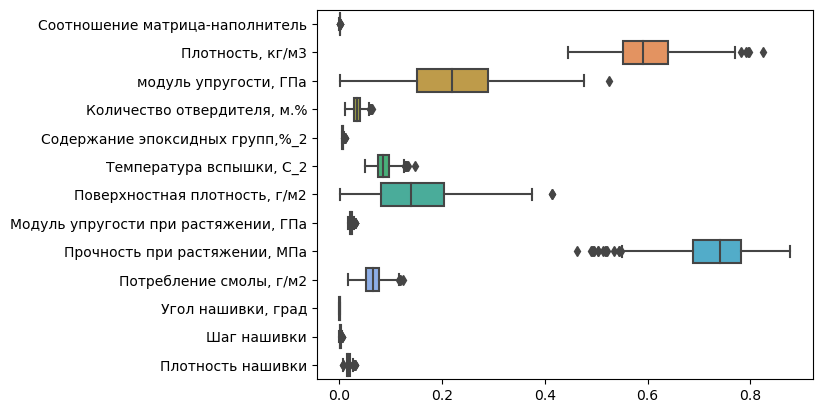

In [43]:
#Ящики с усами 2, очень много выбросов если стандартизация Normalizer
scaler = Normalizer()
scaler.fit(normal)
box_pl3(normal)


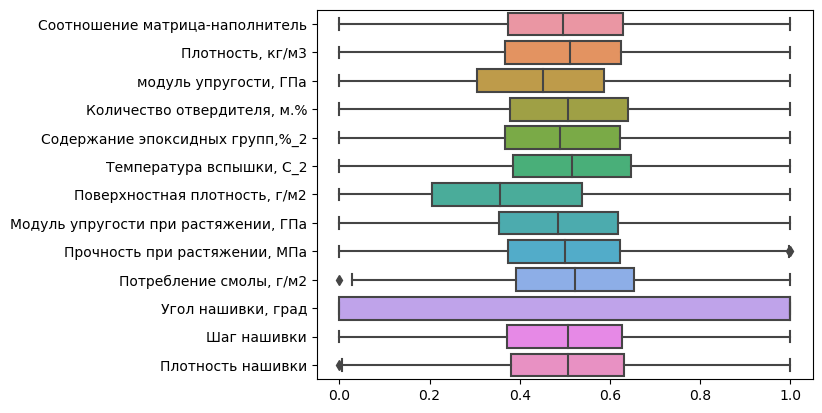

In [53]:
#Ящики с усами 2
scaler = MinMaxScaler()
scaler.fit(minmax)
box_pl3(minmax)


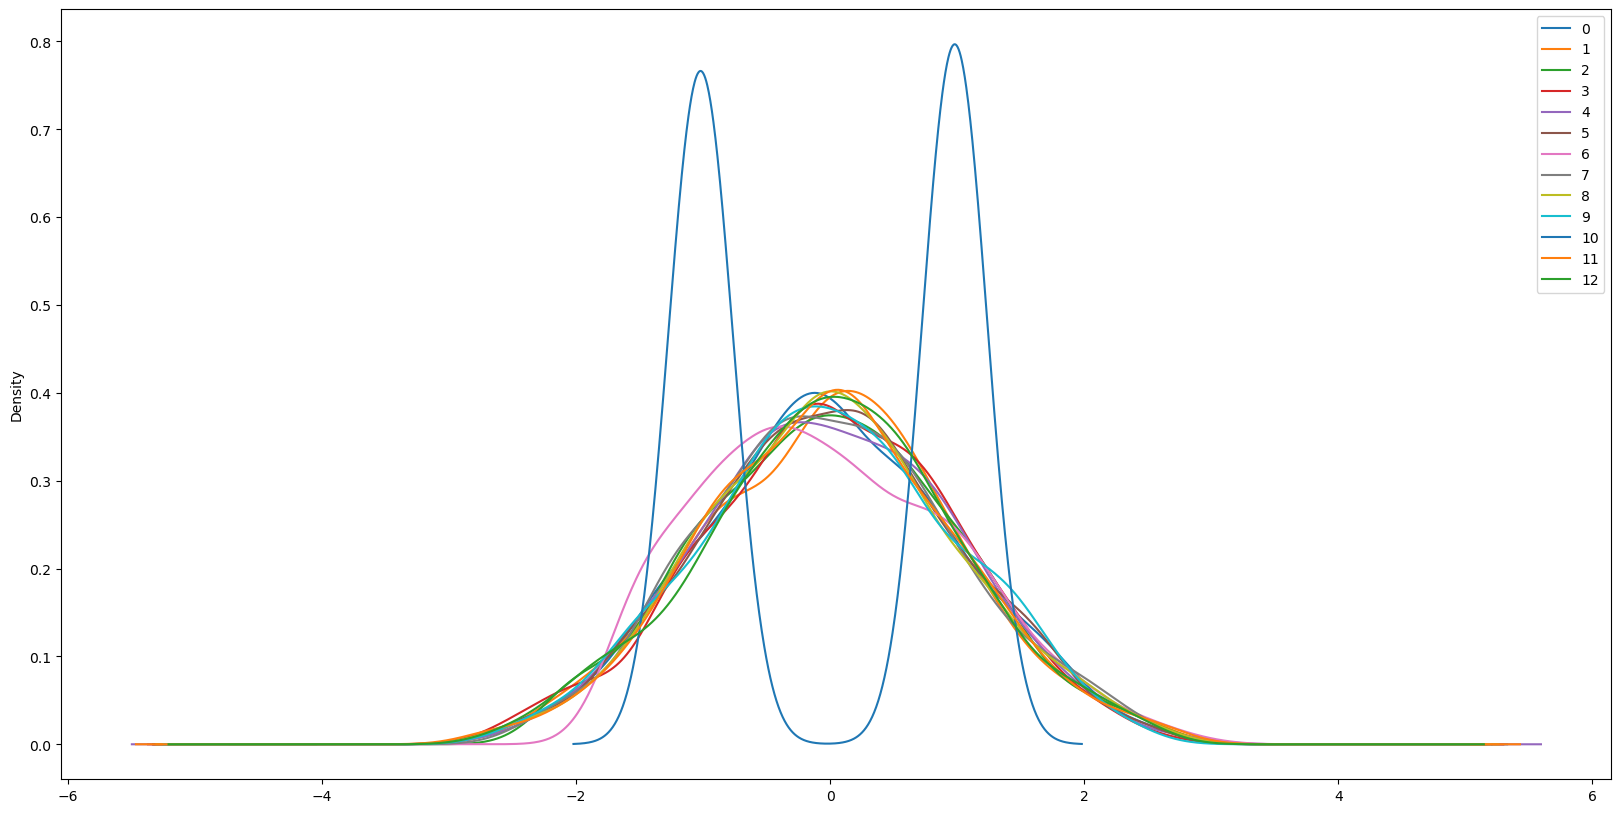

In [56]:
#Стандартизация
st_minmax = data.copy()
st_minmax_res = preprocessing.StandardScaler().fit(st_minmax)
st_minmax_res = st_minmax_res.transform(st_minmax)
st_minmax_res = pd.DataFrame(st_minmax_res)


plt_plot(st_minmax_res)

Разделяем датасет на обучающую и тестовую выборки

Входы и выходы для моделей

In [57]:
# Разбиваем на тестовую, тренировочную выборки (Прочность при растяжении)
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(
    normal.loc[:, normal.columns != 'Прочность при растяжении, МПа'],
    data_norm[['Прочность при растяжении, МПа']],
       test_size = 0.3,
    random_state = 42)

In [286]:
#Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_one):
    return [np.mean(y_test_one) for _ in range(len(y_test_one))]
y_1_pred_mean = mean_model(y_test_one)

In [152]:
#Метод опорных векторов
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))
#обучаем модель
svr.fit(X_train_one, np.ravel(y_train_one))
#вычисляем коэффициент детерминации
y_pred_svr=svr.predict(X_test_one)
mae_svr = mean_absolute_error(y_pred_svr, y_test_one)
R2_svr = r2_score(y_pred_svr, y_test_one)

print('Результат:') 
print("Score: {:.2f}".format(svr.score(X_train_one, y_train_one)))
print('SVR_MAE: {:.2f}'.format(mean_absolute_error(y_test_one, y_pred_svr)))
print('SVR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_one, y_pred_svr)))
print("Test score: {:.2f}".format(svr.score(X_test_one, y_test_one)))
#Результаты модели, выдающей среднее значение
print("MAE for mean target: ", mean_absolute_error(y_test_one, y_1_pred_mean))

Результат:
Score: 0.99
SVR_MAE: 69.61
SVR_MAPE: 0.03
Test score: 0.96
MAE for mean target:  371.1804444908012


In [287]:
loss_df =pd.DataFrame([])

In [288]:
def lossen(loss_df, model_name, abc, y_pred, y_test):
  MSE = mean_squared_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)
  df = pd.DataFrame({'model':model_name,\
                                'target':[abc],\
                                'MSE':MSE,\
                                'R2':R2})
  loss_df = pd.concat([loss_df, df],ignore_index=True)
  return loss_df

In [289]:
model_name = 'Метод опорных векторов'
abc = 'Прочность при растяжении, МПа'
loss_df = lossen(loss_df,model_name,abc,y_pred_svr,y_test_one)
loss_df

model                         target          MSE  \
0  Метод опорных векторов  Прочность при растяжении, МПа  9551.443529   

         R2  
0  0.955032

In [156]:
n = 41
x = np.expand_dims(X_train_one.iloc[n], axis=0)
res = svr.predict(x)
print(res)
y_train_one.iloc[n]

[2397.10852906]


Прочность при растяжении, МПа    2380.258563
Name: 703, dtype: float64

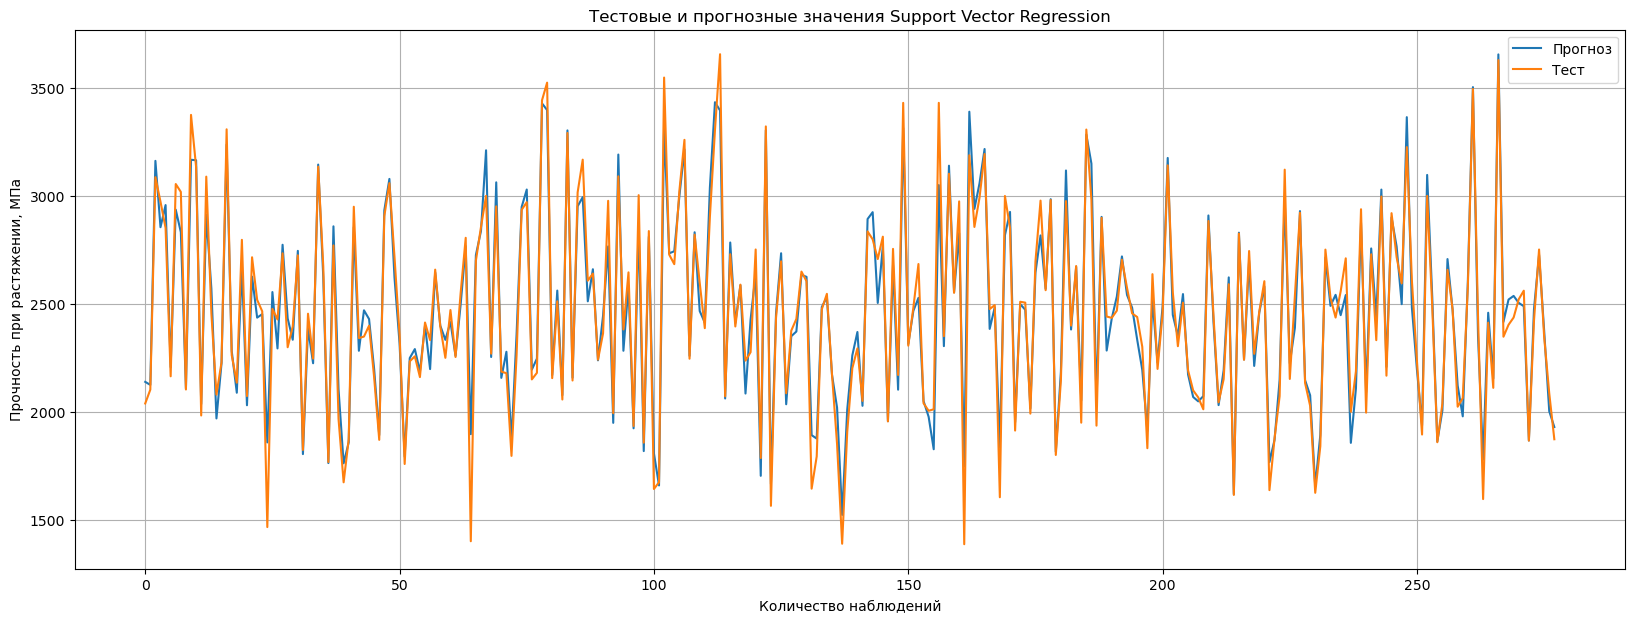

In [157]:
plt.figure(figsize = (20, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr, label = "Прогноз")
plt.plot(y_test_one.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [158]:
# Метод случайного леса
rfr = RandomForestRegressor(n_estimators=15,max_depth=7, random_state=33)
rfr.fit(X_train_one, y_train_one.values)
y_pred_forest = rfr.predict(X_test_one)
mae_rfr = mean_absolute_error(y_pred_forest, y_test_one)
R2_rfr = r2_score(y_pred_forest, y_test_one)

print('Результат:')
print("Score: {:.2f}".format(rfr.score(X_train_one, y_train_one))) 
print('RF_MAE: {:.2f}'.format(mean_absolute_error(y_test_one, y_pred_forest)))
print('RF_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_one, y_pred_forest)))
print("Test score: {:.2f}".format(rfr.score(X_test_one, y_test_one)))

Результат:
Score: 0.99
RF_MAE: 75.72
RF_MAPE: 0.03
Test score: 0.95


In [159]:
model_name = 'Метод случайного леса'
abc = 'Прочность при растяжении, МПа'
loss_df = lossen(loss_df,model_name,abc,y_pred_forest,y_test_one)
loss_df

model                         target           MSE  \
0  Метод опорных векторов  Прочность при растяжении, МПа   9551.443529   
1   Метод случайного леса  Прочность при растяжении, МПа  10217.704986   

         R2  
0  0.955032  
1  0.951896

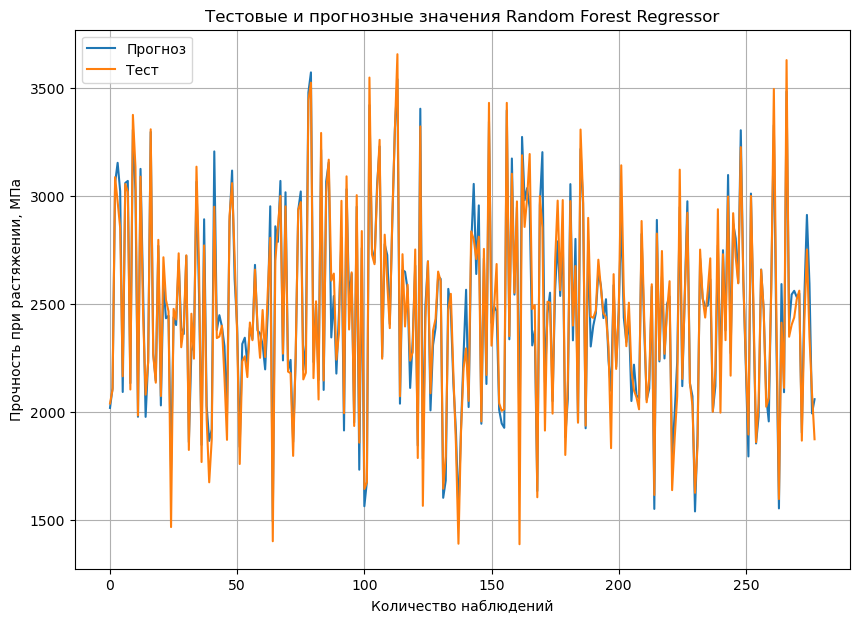

In [160]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_forest, label = "Прогноз")
plt.plot(y_test_one.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

In [292]:
#Метод линейной регрессии
lr = LinearRegression()
lr.fit(X_train_one, y_train_one)
y_pred_lr = lr.predict(X_test_one)
mae_lr = mean_absolute_error(y_pred_lr, y_test_one)
R2_lr = r2_score(y_pred_lr, y_test_one)

print('Резульатат:')
print("Score: {:.2f}".format(lr.score(X_train_one, y_train_one)))
print('lr_MAE: {:.2f}'.format(mean_absolute_error(y_test_one, y_pred_lr)))
print('lr_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_one, y_pred_lr)))
print("Test score: {:.2f}".format(lr.score(X_test_one, y_test_one)))

Резульатат:
Score: 0.97
lr_MAE: 64.60
lr_MAPE: 0.03
Test score: 0.97


In [293]:
model_name = 'Метод линейной регрессии'
abc = 'Прочность при растяжении, МПа'
loss_df = lossen(loss_df,model_name,abc,y_pred_lr,y_test_one)
loss_df

model                         target          MSE  \
0    Метод опорных векторов  Прочность при растяжении, МПа  9551.443529   
1  Метод линейной регрессии  Прочность при растяжении, МПа  6940.273546   
2  Метод линейной регрессии  Прочность при растяжении, МПа  6940.273546   

         R2  
0  0.955032  
1  0.967326  
2  0.967326

In [163]:
#Метода градиентного бустинга
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gbr.fit(X_train_one, np.ravel(y_train_one))
y_pred_gbr = gbr.predict(X_test_one)
mae_gbr = mean_absolute_error(y_pred_gbr, y_test_one)
R2_gbr = r2_score(y_pred_gbr, y_test_one)

print('Результат:')
print("Score: {:.2f}".format(gbr.score(X_train_one, y_train_one))) # Скор для тренировочной выборки
print('GBR_MAE: ', round(mean_absolute_error(y_test_one, y_pred_gbr)))
print('GBR_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_one, y_pred_gbr)))
print("Test score: {:.2f}".format(gbr.score(X_test_one, y_test_one)))# Скор для тестовой выборки

Результат:
Score: 0.99
GBR_MAE:  62
GBR_MAPE: 0.03
Test score: 0.97


In [164]:
model_name = 'Метод градиентного бустинга'
abc = 'Прочность при растяжении, МПа'
loss_df = lossen(loss_df,model_name,abc,y_pred_gbr,y_test_one)
loss_df

model                         target           MSE  \
0       Метод опорных векторов  Прочность при растяжении, МПа   9551.443529   
1        Метод случайного леса  Прочность при растяжении, МПа  10217.704986   
2     Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
3  Метод градиентного бустинга  Прочность при растяжении, МПа   6212.086851   

         R2  
0  0.955032  
1  0.951896  
2  0.967326  
3  0.970754

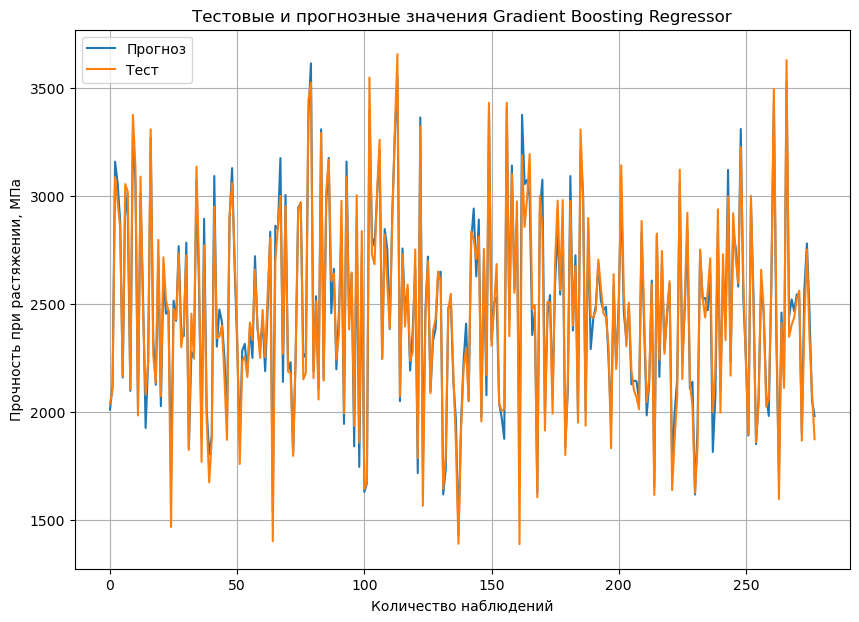

In [165]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Gradient Boosting Regressor")
plt.plot(y_pred_gbr, label = "Прогноз")
plt.plot(y_test_one.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);
#Градиентный бустинг с задачей справился в 97 % случаев.

In [294]:
# Метод К ближайших соседей
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train_one, y_train_one)
y_pred_knn = knr.predict(X_test_one)
mae_knr = mean_absolute_error(y_pred_knn, y_test_one)
R2_knr = r2_score(y_pred_knn, y_test_one)

print('K Neighbors Regressor  Results Train:')
print("Score: {:.2f}".format(knr.score(X_train_one, y_train_one)))
print('K Neighbors Regressor  Results:')
print('KNN_MAE: ', round(mean_absolute_error(y_test_one, y_pred_knn)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_one, y_pred_knn)))
print("Test score: {:.2f}".format(knr.score(X_test_one, y_test_one)))

K Neighbors Regressor  Results Train:
Score: 0.95
K Neighbors Regressor  Results:
KNN_MAE:  106
KNN_MAPE: 0.05
Test score: 0.92


In [308]:
model_name = 'Метод к ближайших соседей'
abc = 'Прочность при растяжении, МПа'
loss_df = lossen(loss_df,model_name,abc,y_pred_knn,y_test_one)
loss_df

model                         target           MSE  \
0     Метод опорных векторов  Прочность при растяжении, МПа   9551.443529   
1   Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
2   Метод линейной регрессии  Прочность при растяжении, МПа   6940.273546   
3  Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   
4  Метод к ближайших соседей  Прочность при растяжении, МПа  17722.988965   

         R2  
0  0.955032  
1  0.967326  
2  0.967326  
3  0.916561  
4  0.916561

In [310]:
del mae_df

In [ ]:
#Выводим гиперпараметры для оптимальной модели
print(grid.best_estimator_)
knr_upr = grid.best_estimator_
print(f'R2-score RFR для прочности при растяжении, МПа: {knr_upr.score(X_test_one, y_test_one).round(3)}')
#подставим оптимальные гиперпараметры в нашу модель случайного леса
rfr_grid = RandomForestRegressor(n_estimators = 300, criterion = 'mse', max_depth = 15, max_features = 'auto')
#Обучаем модель
rfr_grid.fit(X_train_one, y_train_one)

pred_rfr_grid = rfr_grid.predict(X_test_one)
#Оцениваем точность на тестовом наборе
mae_rfr_grid = mean_absolute_error(pred_rfr_grid, y_test_one)

rfr_mae = mean_absolute_error(y_test_one, pred_rfr_grid)
rfr_mape = mean_absolute_percentage_error(y_test_one, pred_rfr_grid)
rfr_score_1 = rfr_grid.score(X_train_one, y_train_one)
rfr_score = rfr_grid.score(X_test_one, y_test_one)
rfr_R2 = r2_score(y_test_one, pred_rfr_grid)


# модуль упругости при растяжении

In [316]:
# Разбиваем на тестовую, тренировочную выборки (Прочность при растяжении)
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    normal.loc[:, normal.columns != 'Модуль упругости при растяжении, ГПа'],
    data_norm[['Модуль упругости при растяжении, ГПа']],
       test_size = 0.3,
    random_state = 42)


In [318]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test_two):
    return [np.mean(y_test_two) for _ in range(len(y_test_two))]
y_2_pred_mean = mean_model(y_test_two)

In [321]:
#Метод опорных векторов
svr2 = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C = 500.0, epsilon = 1.0))

#обучаем модель
svr2.fit(X_train_two, np.ravel(y_train_two))

y_pred_svr2 = svr2.predict(X_test_two)
mae_svr2 = mean_absolute_error(y_pred_svr2, y_test_two)
print('Support Vector Regression Results Train:') 
print('Support Vector Regression Results:')
print('SVR MAE: {:.5f}'.format(mean_absolute_error(y_test_two, y_pred_svr2)))
print('SVR MAPE: {:.5f}'.format(mean_absolute_percentage_error(y_test_two, y_pred_svr2)))
print('SVR MAPE: {:.5f}'.format(mean_absolute_percentage_error(y_test_two, y_pred_svr2)))
print("Train core: {:.2f}".format(svr2.score(X_train_two, y_train_two)))
print("Test score: {:.2f}".format(svr2.score(X_test_two, y_test_two)))
#Результаты модели, выдающей среднее значение
print("MAE for mean target: ", mean_absolute_error(y_test_two, y_2_pred_mean))

Support Vector Regression Results Train:
Support Vector Regression Results:
SVR_MAE: 3.44617
SVR_MAPE: 0.04724
SVR_MAPE: 0.04724
Train core: 0.90
Test score: -1.03
MAE for mean target:  2.4458905302866936


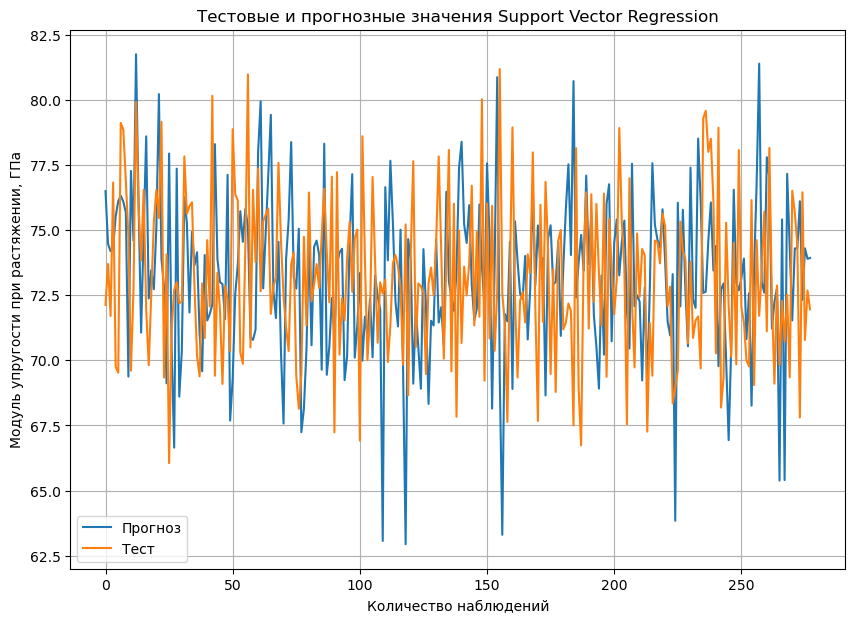

In [322]:
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Support Vector Regression")
plt.plot(y_pred_svr2, label = "Прогноз")
plt.plot(y_test_two.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.44
RF_MAE: 2.5469516458
RF_MAPE: 0.0348912694
Test score: -0.0919659356


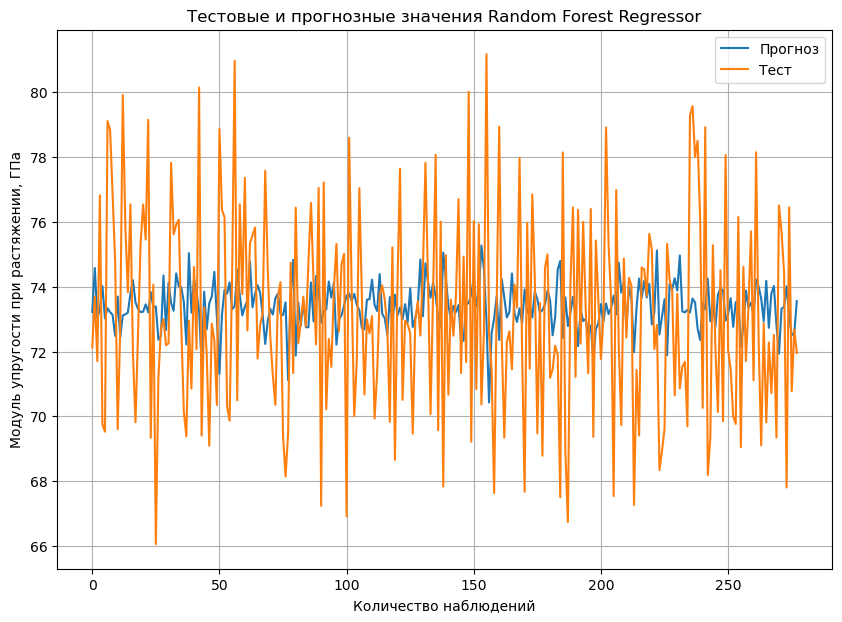

In [323]:
# Метод случайного леса
rfr2 = RandomForestRegressor(n_estimators = 15,max_depth = 7, random_state = 33)
rfr2.fit(X_train_two, y_train_two.values)
y_pred_forest2 = rfr2.predict(X_test_two)
mae_rfr2 = mean_absolute_error(y_pred_forest2, y_test_two)
print('Результат:')
print("Score: {:.2f}".format(rfr2.score(X_train_two, y_train_two)))
print('RF_MAE: {:.10f}'.format(mean_absolute_error(y_test_two, y_pred_forest2)))
print('RF_MAPE: {:.10f}'.format(mean_absolute_percentage_error(y_test_two, y_pred_forest2)))
print("Test score: {:.10f}".format(rfr2.score(X_test_two, y_test_two))) 
plt.figure(figsize=(10, 7))
plt.title("Тестовые и прогнозные значения Random Forest Regressor")
plt.plot(y_pred_forest2, label = "Прогноз")
plt.plot(y_test_two.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.015818536681407535660071062011
lr_MAE: 2.462732391521207819806704719667
lr_MAPE: 0.033725064452920519575407354296
Test score: -0.007923859607695593609832940274


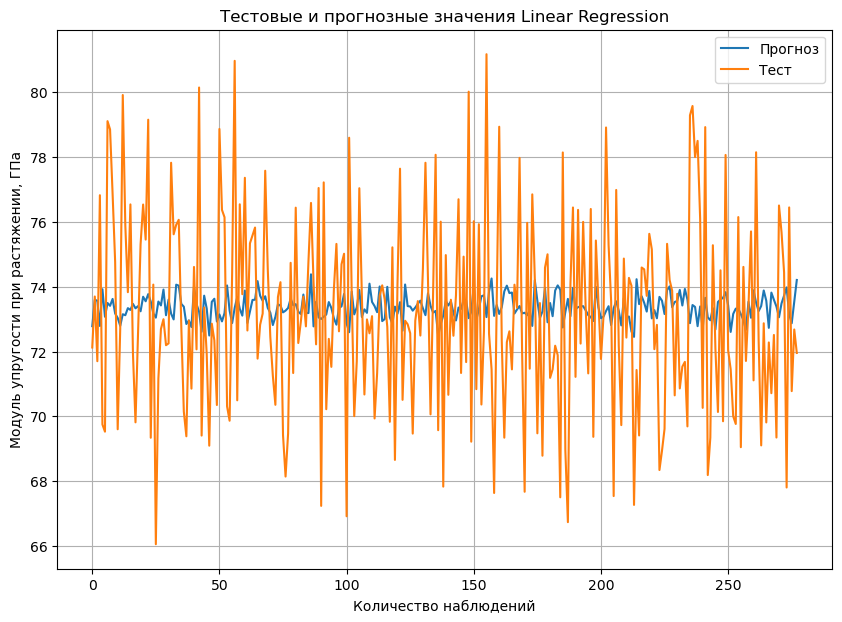

In [324]:
#Метод линейной регрессии

lr2 = LinearRegression()
lr2.fit(X_train_two, y_train_two)
y_pred_lr2 = lr2.predict(X_test_two)
mae_lr2 = mean_absolute_error(y_pred_lr2, y_test_two)
print('Результат:')
print("Score: {:.30f}".format(lr2.score(X_train_two, y_train_two)))
print('lr_MAE: {:.30f}'.format(mean_absolute_error(y_test_two, y_pred_lr2)))
print('lr_MAPE: {:.30f}'.format(mean_absolute_percentage_error(y_test_two, y_pred_lr2)))
print("Test score: {:.30f}".format(lr2.score(X_test_two, y_test_two)))
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения Linear Regression")
plt.plot(y_pred_lr2, label = "Прогноз")
plt.plot(y_test_two.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

Результат:
Score: 0.19
KNN_MAE:  3
KNN_MAPE: 0.04
Test score: -0.12


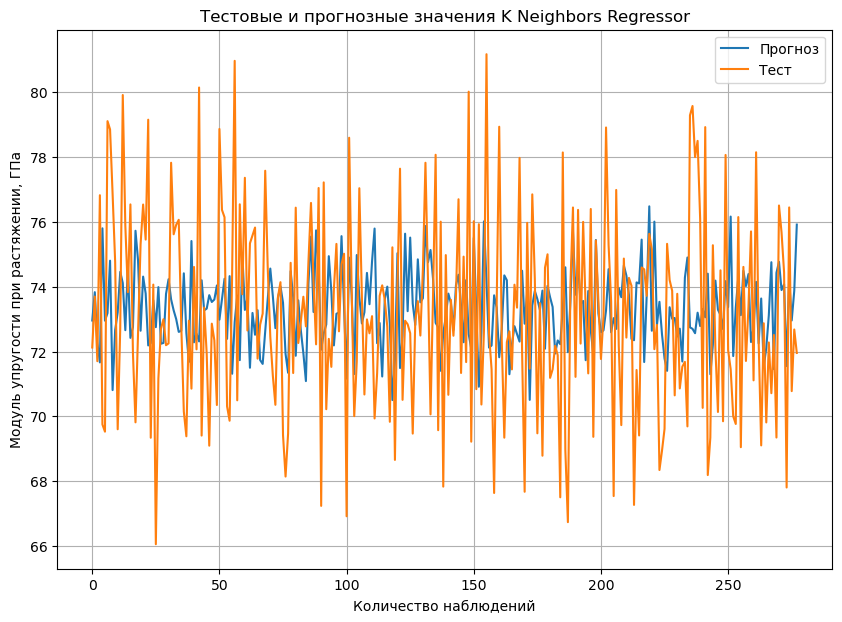

In [325]:
# Метод К ближайших соседей
knr2 = KNeighborsRegressor(n_neighbors=5)
knr2.fit(X_train_two, y_train_two)
y_pred_knn2 = knr2.predict(X_test_two)
mae_knr2 = mean_absolute_error(y_pred_knn2, y_test_two)
print('Результат:')
print("Score: {:.2f}".format(knr2.score(X_train_two, y_train_two)))
print('KNN_MAE: ', round(mean_absolute_error(y_test_two, y_pred_knn2)))
print('KNN_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test_two, y_pred_knn2)))
print("Test score: {:.2f}".format(knr2.score(X_test_two, y_test_two)))# Скор для тестовой выборки
plt.figure(figsize = (10, 7))
plt.title("Тестовые и прогнозные значения K Neighbors Regressor")
plt.plot(y_pred_knn2, label = "Прогноз")
plt.plot(y_test_two.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении, ГПа")
plt.legend()
plt.grid(True);

In [ ]:
#Cравнение моделей МАЕ и R2 с сортировкой
mae_df = {'Регрессор': ['Опорные вектора', 'Случайный лес', 'Линейная регрессия', 'Градиентный бустинг', 'К ближайшие соседи','К ближайшие соседи_Grid','Случайный лес_Grid'], 'MAE': [mae_svr, mae_rfr, mae_lr, mae_gbr, mae_knr, knr_mae, rfr_mae], 'R2': [R2_svr, R2_rfr, R2_lr, R2_gbr, R2_knr, knr_R2, rfr_R2]} 
mae_df = pd.DataFrame(mae_df)
sorted_df = mae_df.sort_values(by='R2', ascending=False)
sorted_df


Рекомендательная нейросеть для соотношения матрица-наполнитель


In [364]:
#Сформируем входы и выход для модели
tv = data['Соотношение матрица-наполнитель']
tr_v = data.loc[:, data.columns != 'Соотношение матрица-наполнитель']

#Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

#Нормализуем данные
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [373]:
# визуализация факт/прогноз
def pred_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()

In [365]:
model_NN = Sequential([
    x_train_n, 
    Dense(128, activation='relu'),                                              
    Dense(64, activation='relu'), 
    Dense(16, activation='relu'),
    Dense(3, activation='relu'), 
    Dense(3, activation='relu'), 
    Dense(1)
    ])
model_NN.compile(optimizer = tf.keras.optimizers.Adam(0.001), 
loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])  


In [366]:
model_NN.summary()
# Обучим модель

model_hist1 = model_NN.fit(
    x_train, 
    y_train, 
    epochs = 100, 
    verbose = 1, 
    validation_split = 0.2)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_9 (Normalizati (None, 12)                25        
_________________________________________________________________
dense_96 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_97 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_98 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_99 (Dense)             (None, 3)                 51        
_________________________________________________________________
dense_100 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_101 (Dense)            (None, 1)               

Epoch 89/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 1.3802 - val_root_mean_squared_error: 1.1748
Epoch 90/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - val_loss: 1.3896 - val_root_mean_squared_error: 1.1788
Epoch 91/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0069 - root_mean_squared_error: 0.0832 - val_loss: 1.3646 - val_root_mean_squared_error: 1.1682
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0068 - root_mean_squared_error: 0.0823 - val_loss: 1.3645 - val_root_mean_squared_error: 1.1681
Epoch 93/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 1.3802 - val_root_mean_squared_error: 1.1748
Epoch 94/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 1.3690 - val_

In [367]:

# оценка модели MSE
model_NN.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 2ms/step - loss: 1.3590 - root_mean_squared_error: 1.1658


[1.358999490737915, 1.1657613515853882]

In [368]:
y_pred_model = model_NN.predict(x_test)

In [369]:
print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))


Model Results:
Model_MAE:  1
Model_MAPE: 0.39
Test score: 1.36


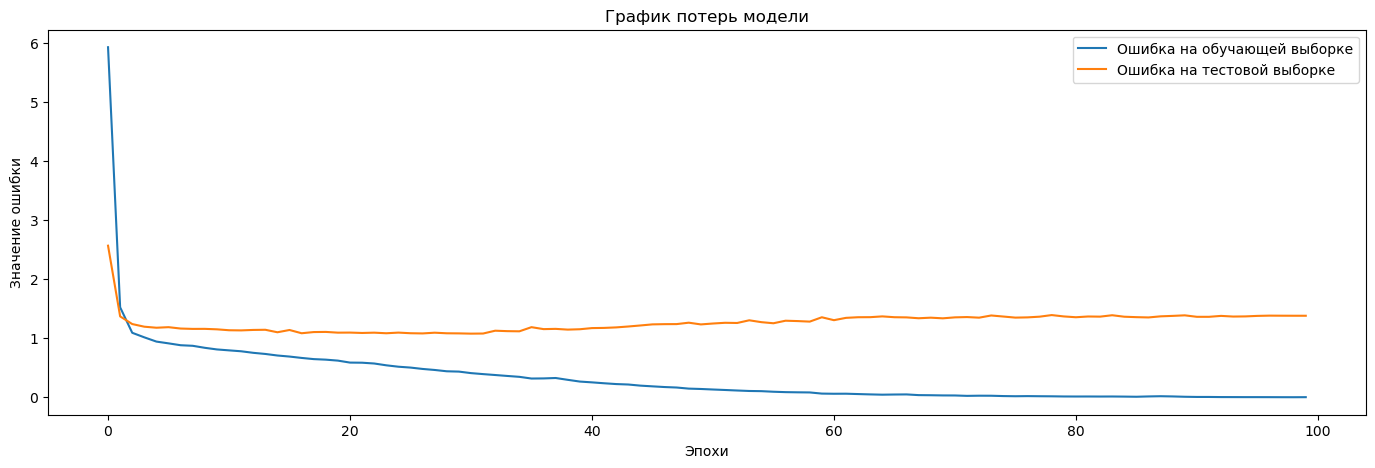

In [370]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist1.history['loss'],
             label = 'ошибка на обучающей выборке')
    plt.plot(model_hist1.history['val_loss'],
            label = 'ошибка на тестовой выборке')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
    plt.show()
model_loss_plot(model_hist1)

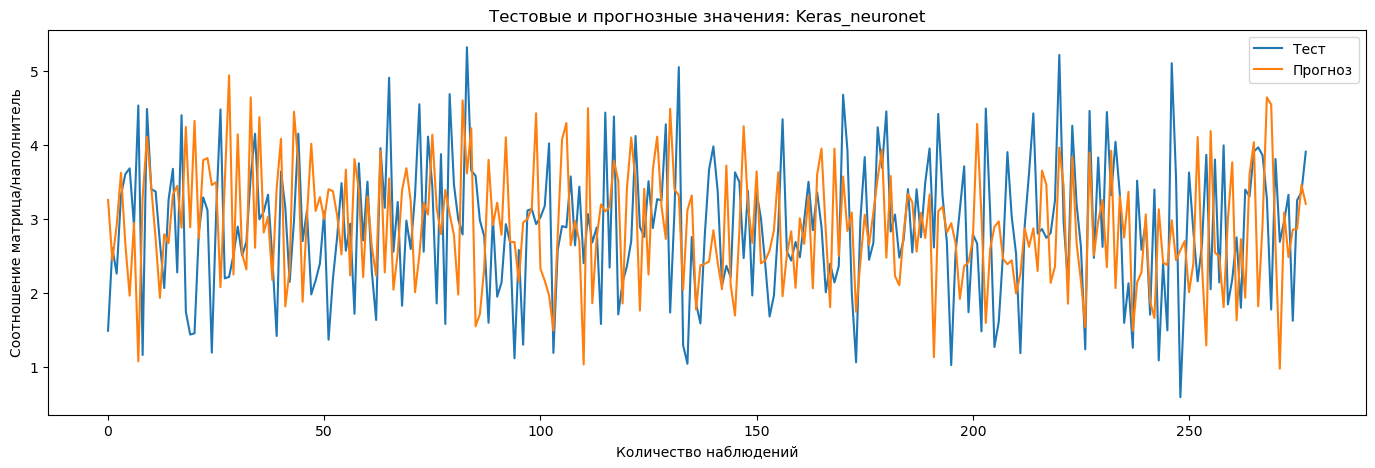

In [376]:
# Посмотрим на график результата работы модели
pred_plot(y_test.values, model_NN.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')


In [372]:

# оценка модели MSE
model_NN.evaluate(x_test, y_test, verbose = 1)

9/9 [==============================] - 0s 2ms/step - loss: 1.3590 - root_mean_squared_error: 1.1658


[1.358999490737915, 1.1657613515853882]

In [429]:
y_pred_model = model_NN.predict(x_test)
y_pred_model[:1]

array([[3.2565048]], dtype=float32)

In [ ]:
print("Ноль завершит работу программы 1-start, 0-exit")

for i in range(len(df_n)):
    df.loc[i, 'wq'] = i*5
while True:
    s = input("1-start, 0-exit")
    if s == '0':
        break
    if s !=0:
        n = input("1-start, 0-exit")
        x = np.expand_dims(X_train_one.iloc[n], axis=0)
        res = svr.predict(x)
        print(res)
        y_train_one.iloc[n]
       